<a href="https://colab.research.google.com/github/kush1912/Bug-Report-Classification-Lucene-Java/blob/master/Bug_Report_Classification_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#Importing all the libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
import re
import seaborn as sb

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [0]:
from google.colab import drive
drive.mount('/content/drive')

In [0]:
!ls "/content/drive/My Drive/Datasets/Bug Report classification"

In [0]:
#Funtion to combine multiple CSV files
def combine_csv_files(file_path,s = 9):
  data = pd.read_csv(file_path+ str(1) +".csv")
  for i in range(2,s):
    add_data = pd.read_csv(file_path+ str(i) + ".csv")
    data = pd.concat([data,add_data])
  return data

In [0]:
path = "/content/drive/My Drive/Datasets/Bug Report classification/ASF JIRA " 
data = combine_csv_files(path)

In [0]:
# Text Processing Function
def text_processing(dataset):
  # Removing contents of tags and all for further text processing
  dataset['Description'].replace(regex=True,inplace=True, to_replace= r'<.+?>', value=r' ')
  dataset['Summary'].replace(regex=True,inplace=True, to_replace= r'<.+?>', value=r' ')

  # Removing links from all for further text processing
  dataset['Description'].replace(regex=True,inplace=True, to_replace= r'(https?:\/\/)(\s)*(www\.)?(\s)*((\w|\s)+\.)*([\w\-\s]+\/)*([\w\-]+)((\?)?[\w\s]*=\s*[\w\%&]*)*', value=r' ')
  dataset['Summary'].replace(regex=True,inplace=True, to_replace= r'(https?:\/\/)(\s)*(www\.)?(\s)*((\w|\s)+\.)*([\w\-\s]+\/)*([\w\-]+)((\?)?[\w\s]*=\s*[\w\%&]*)*', value=r' ')

  # Replace email addresses
  dataset['Description'].replace(regex=True,inplace=True, to_replace= r'^.+@[^\.].*\.[a-z]{2,}$', value=r'')
  dataset['Summary'].replace(regex=True,inplace=True, to_replace= r'^.+@[^\.].*\.[a-z]{2,}$', value=r'')

  # Replace URLs with 'web-address'
  dataset['Description'].replace(regex=True,inplace=True, to_replace= r'^http\://[a-zA-Z0-9\-\.]+\.[a-zA-Z]{2,3}(/\S*)?$', value=r'')
  dataset['Summary'].replace(regex=True,inplace=True, to_replace= r'^http\://[a-zA-Z0-9\-\.]+\.[a-zA-Z]{2,3}(/\S*)?$', value=r'')

  # Replace 10 digit phone numbers
  dataset['Description'].replace(regex=True,inplace=True, to_replace= r'\(?[\d]{3}\)?[\s-]?[\d]{3}[\s-]?[\d]{4}$', value=r'')
  dataset['Summary'].replace(regex=True,inplace=True, to_replace= r'\(?[\d]{3}\)?[\s-]?[\d]{3}[\s-]?[\d]{4}$', value=r'')

  # Replace numbers with 'numbr'
  dataset['Description'].replace(regex=True,inplace=True, to_replace= r'\d+(\.\d+)?', value=r'')
  dataset['Summary'].replace(regex=True,inplace=True, to_replace= r'\d+(\.\d+)?', value=r'')

  # Remove punctuation
  dataset['Description'].replace(regex=True,inplace=True, to_replace= r'[^\w\d\s]', value=r'')
  dataset['Summary'].replace(regex=True,inplace=True, to_replace= r'[^\w\d\s]', value=r'')

  #converting to lower case
  dataset['Description'] = dataset['Description'].str.lower()
  dataset['Summary'] = dataset['Summary'].str.lower()

  # Removing rows with empty columns 
  dataset.dropna(subset=['Description','Summary'],inplace=True)
  dataset.reset_index(inplace = True)
  return dataset 

In [0]:
cols_of_interest=["Issue key","Issue id","Summary","Status","Description","Priority","Resolution","Assignee","Created","Updated","Last Viewed","Resolved","Issue Type"]
dataset=data[cols_of_interest]
dataset = text_processing(dataset)
dataset["Merged"] = dataset["Summary"].str.cat(dataset["Description"], sep =" \n ")

In [0]:
print(dataset.shape)
dataset.head()

(7191, 15)


,index,Issue key,Issue id,Summary,Status,Description,Priority,Resolution,Assignee,Created,Updated,Last Viewed,Resolved,Issue Type,Merged
0,0,LUCENE-8898,13242651,testramusageestimatortestmap failures,Closed,here is an example failure\r\n\r\nnoformat\r\n...,Blocker,Fixed,ab,02/Jul/19 05:56,26/Jul/19 08:54,29/Sep/19 11:25,04/Jul/19 12:05,Bug,testramusageestimatortestmap failures \n here ...
1,1,LUCENE-8907,13244057,provide backward compatibility for loading ana...,Closed,the changes in lucene have breaking changes in...,Blocker,Fixed,tomoko,10/Jul/19 09:32,26/Jul/19 08:54,29/Sep/19 11:28,11/Jul/19 14:56,Task,provide backward compatibility for loading ana...
2,2,LUCENE-8807,13234613,change all download urls in build files to https,Closed,at least for lucene this is not a security iss...,Blocker,Fixed,uschindler,21/May/19 13:42,05/Jun/19 21:30,29/Sep/19 11:28,21/May/19 15:51,Task,change all download urls in build files to htt...
3,3,LUCENE-7698,13043903,commongramsqueryfilter in the query analyzer c...,Resolved,please pardon me if the project or component a...,Blocker,Fixed,NaN,17/Feb/17 08:47,03/Apr/19 08:21,29/Sep/19 11:28,22/Feb/17 10:55,Bug,commongramsqueryfilter in the query analyzer c...
4,4,LUCENE-6572,12838134,highlighter depends on analyzerscommon,Closed,this is a huge wtf just for limittokenoffsetfi...,Blocker,Fixed,simonw,16/Jun/15 11:26,14/Mar/19 13:08,29/Sep/19 11:28,17/Oct/18 17:04,Bug,highlighter depends on analyzerscommon \n this...


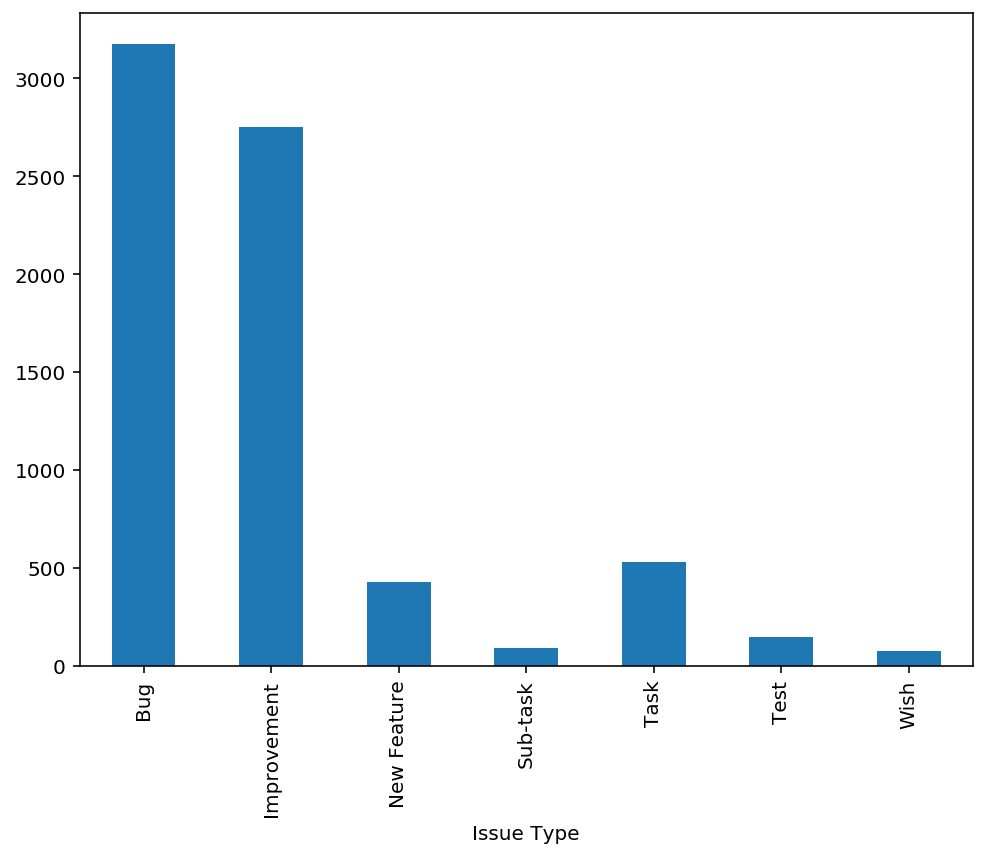

<Figure size 432x288 with 0 Axes>

In [0]:
fig = plt.figure(figsize=(8,6))
dataset.groupby('Issue Type').Status.count().plot.bar(ylim=0)
plt.show()
plt.savefig("Distribution.png",bbox_inches='tight')

In [0]:
category_counter={x:0 for x in set(dataset['Issue Type'])}
for each_cat in dataset['Issue Type']:
    category_counter[each_cat]+=1
print(category_counter)

{'Wish': 74, 'Task': 530, 'Improvement': 2751, 'Sub-task': 93, 'Bug': 3172, 'Test': 146, 'New Feature': 425}


In [0]:
#Label Encoding  
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
dataset["Issue Type"] = label.fit_transform(dataset["Issue Type"])
dataset.head()


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,index,Issue key,Issue id,Summary,Status,Description,Priority,Resolution,Assignee,Created,Updated,Last Viewed,Resolved,Issue Type,Merged
0,0,LUCENE-8898,13242651,testramusageestimatortestmap failures,Closed,here is an example failure\r\n\r\nnoformat\r\n...,Blocker,Fixed,ab,02/Jul/19 05:56,26/Jul/19 08:54,29/Sep/19 11:25,04/Jul/19 12:05,0,testramusageestimatortestmap failures \n here ...
1,1,LUCENE-8907,13244057,provide backward compatibility for loading ana...,Closed,the changes in lucene have breaking changes in...,Blocker,Fixed,tomoko,10/Jul/19 09:32,26/Jul/19 08:54,29/Sep/19 11:28,11/Jul/19 14:56,4,provide backward compatibility for loading ana...
2,2,LUCENE-8807,13234613,change all download urls in build files to https,Closed,at least for lucene this is not a security iss...,Blocker,Fixed,uschindler,21/May/19 13:42,05/Jun/19 21:30,29/Sep/19 11:28,21/May/19 15:51,4,change all download urls in build files to htt...
3,3,LUCENE-7698,13043903,commongramsqueryfilter in the query analyzer c...,Resolved,please pardon me if the project or component a...,Blocker,Fixed,NaN,17/Feb/17 08:47,03/Apr/19 08:21,29/Sep/19 11:28,22/Feb/17 10:55,0,commongramsqueryfilter in the query analyzer c...
4,4,LUCENE-6572,12838134,highlighter depends on analyzerscommon,Closed,this is a huge wtf just for limittokenoffsetfi...,Blocker,Fixed,simonw,16/Jun/15 11:26,14/Mar/19 13:08,29/Sep/19 11:28,17/Oct/18 17:04,0,highlighter depends on analyzerscommon \n this...


In [0]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7191 entries, 0 to 7190
Data columns (total 15 columns):
index          7191 non-null int64
Issue key      7191 non-null object
Issue id       7191 non-null int64
Summary        7191 non-null object
Status         7191 non-null object
Description    7191 non-null object
Priority       7191 non-null object
Resolution     7191 non-null object
Assignee       4780 non-null object
Created        7191 non-null object
Updated        7191 non-null object
Last Viewed    7191 non-null object
Resolved       7191 non-null object
Issue Type     7191 non-null int64
Merged         7191 non-null object
dtypes: int64(3), object(12)
memory usage: 842.8+ KB


In [0]:
from google.colab import files

dataset.to_csv('Lucene_final.csv')
files.download('Lucene_final.csv')

In [0]:
tfidf = TfidfVectorizer(stop_words='english',ngram_range=(1,2),min_df=0.1,max_df = 0.20)
vectorizer = tfidf.fit(dataset.Merged)
transformed_summary = vectorizer.transform(dataset.Merged)

In [0]:
feature_names = tfidf.get_feature_names()

In [0]:
#Returns dictionary with term names and total tfidf scores for all terms in corpus
def get_tfidf_term_scores(feature_names):
    term_corpus_dict = {} 
    for term_ind, term in enumerate(feature_names):
        term_name = feature_names[term_ind]
        term_corpus_dict[term_name] = np.sum(transformed_summary.T[term_ind].toarray())
        
    return term_corpus_dict

In [0]:
#Returns sort words from highest score to lowest score
def get_sorted_tfidf_scores(term_corpus_dict):
    sortedIndices = np.argsort( list(term_corpus_dict.values()))[::-1]
    termNames = np.array(list(term_corpus_dict.keys()))
    scores = np.array(list(term_corpus_dict.values()))
    termNames = termNames[sortedIndices]
    scores = scores[sortedIndices]
    
    return termNames, scores

In [0]:
term_corpus_dict = get_tfidf_term_scores(feature_names)


In [0]:
termNames, scores = get_sorted_tfidf_scores(term_corpus_dict)

In [0]:
def plot_tfidf_scores(scores,termNames, n_words = 20):
    fig = plt.figure(figsize = (15, 15))
    override = {'fontsize': 'large'}
    fig.add_subplot(221)   
    sb.set()
    sb.barplot(x = scores[:n_words], y = termNames[:n_words]);
    plt.title(" Top TFIDF score of top 20 words in Summary and Description Combined".format(n_words));
    plt.xlabel("TFIDF Score")
    plt.ylabel("Words")

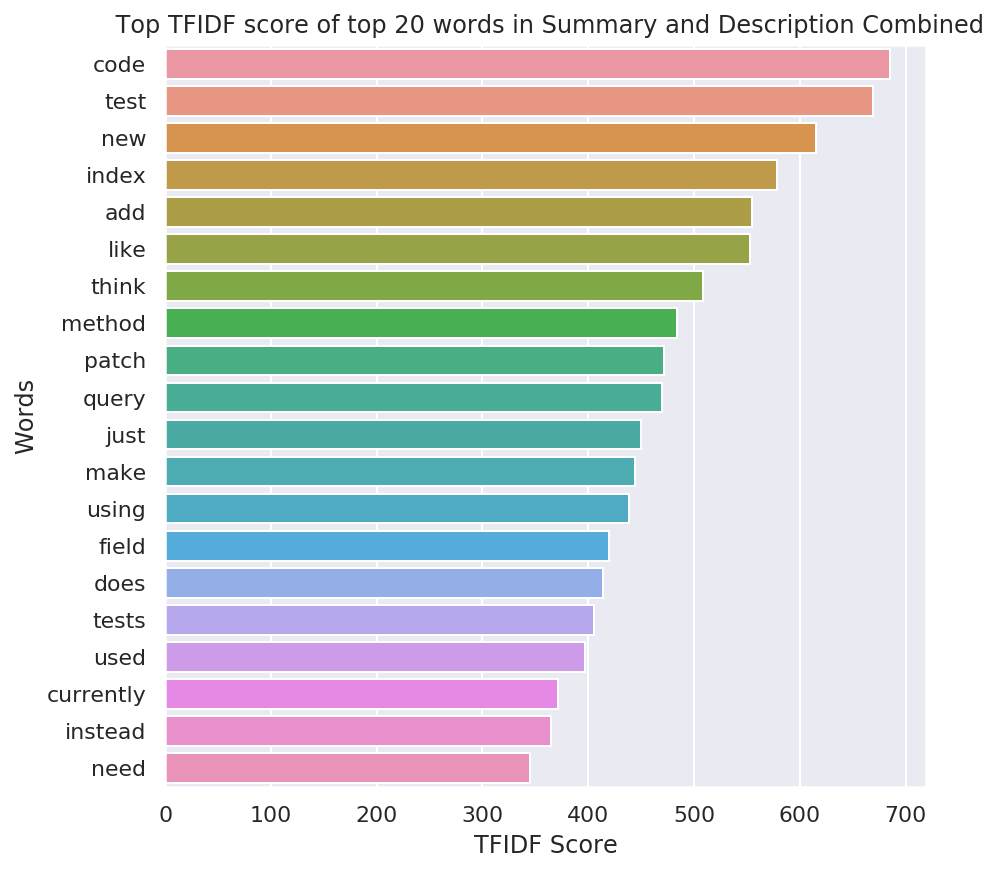

In [0]:
plot_tfidf_scores(scores, termNames, n_words = 20)

In [0]:
diff_corpus = []
for i in range(0,7,1):
  diff_corpus.append(list())
for i in range(0,dataset.shape[0],1):
  diff_corpus[dataset["Issue Type"][i]].append(dataset.Merged[i])

In [0]:
most_freq_w_in_class=list()

In [0]:
def plot_tfidf_scores_category(scores,termNames, n_words = 20):
    fig = plt.figure(figsize = (15, 15))
    override = {'fontsize': 'large'}
    fig.add_subplot(221)   
    sb.set()
    sb.barplot(x = scores[:n_words], y = termNames[:n_words]);
    plt.title(" Top TFIDF score of top {} words".format(n_words));
    plt.xlabel("TFIDF Score")
    plt.ylabel("Words")
    plt.savefig("{}.png".format(i),bbox_inches='tight')

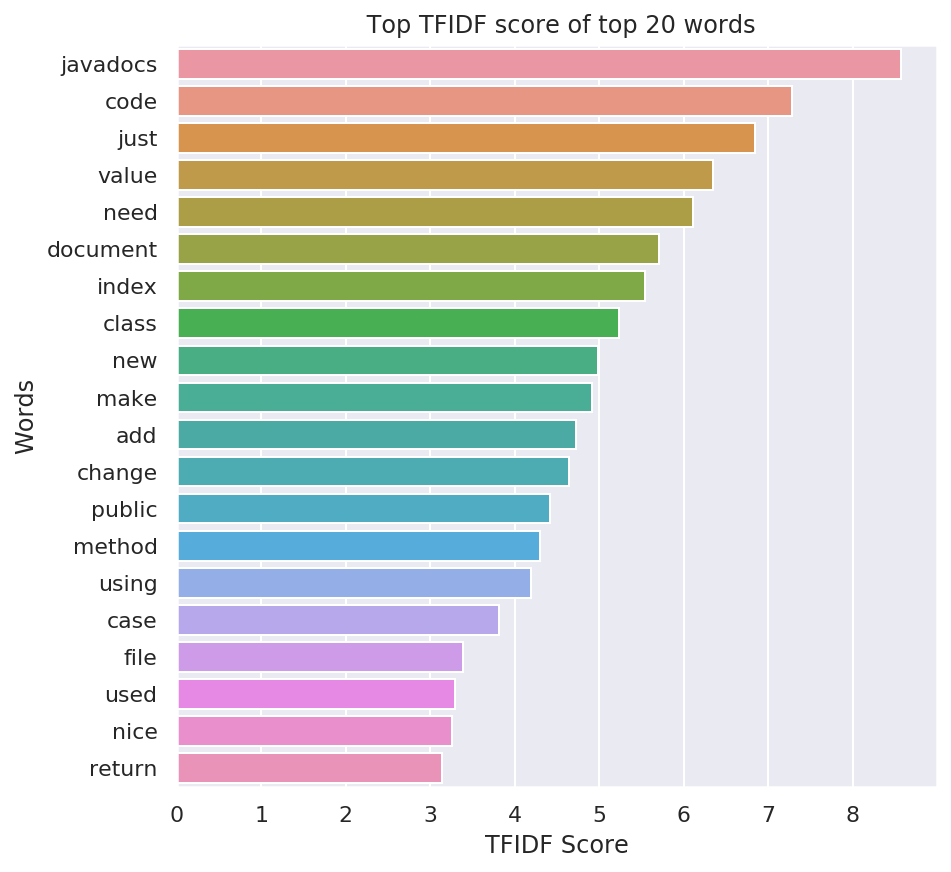

In [0]:
for i in range(0,7,1):
  plt.close()
  vectorizer = tfidf.fit(diff_corpus[i])
  transformed_summary = vectorizer.transform(diff_corpus[i])
  feature_names = tfidf.get_feature_names()
  term_corpus_dict = get_tfidf_term_scores(feature_names)
  termNames, scores = get_sorted_tfidf_scores(term_corpus_dict)
  most_freq_w_in_class.append(list(termNames[0:10]))
  plot_tfidf_scores_category(scores, termNames, n_words = 20)

In [0]:
import plotly.graph_objects as go
fig = go.Figure(data=[go.Table(header=dict(values=['Bug','Improvement','New Feature','Sub-task','Task','Test','Wish']),
                 cells=dict(values=most_freq_w_in_class))])
fig.show()

In [0]:
def difference_in_date(create,resolve):
     vari=int(resolve[7:9])-int(create[7:9])
     vari=vari*8760
   
     dict={'Jan':1,'Feb':2,'Mar':3,'Apr':4,'May':5,'Jun':6,'Jul':7,'Aug':8,'Sep':9,'Oct':10,'Nov':11,'Dec':12}
     if(dict[resolve[3:6]]>=dict[create[3:6]]):
      vari+=(int(dict[resolve[3:6]])-int(dict[create[3:6]]))*720
     else:
      vari-=(int(dict[create[3:6]])-int(dict[resolve[3:6]]))*720
 
    
     if(int(create[0:2])<=int(resolve[0:2])):
      vari+=(int(resolve[0:2])-int(create[0:2]))*24
     else:
      vari-=(int(create[0:2])-int(resolve[0:2]))*24
     
    
     if(int(create[10:12])<=int(resolve[10:12])):
      vari+=int(resolve[10:12])-int(create[10:12])
     else:
      vari-=int(create[10:12])-int(resolve[10:12])
     
    
     if(int(create[13:15])<=int(resolve[13:15])):
      vari+=(int(resolve[13:15])-int(create[13:15]))/60
     else:
      vari-=(int(create[13:15])-int(resolve[13:15]))/60
     return vari

In [0]:
dict={'Jan':1,'Feb':2,'Mar':3,'Apr':4,'May':5,'Jun':6,'Jul':7,'Aug':8,'Sep':9,'Oct':10,'Nov':11,'Dec':12}
dict[dataset.Created[1][3:6]]

7

In [0]:
x=[0,0,0,0,0,0,0]
y=[0,0,0,0,0,0,0]
for i in range(0,dataset.shape[0],1):
  z=difference_in_date(dataset.Created[i],dataset.Resolved[i])
  x[dataset["Issue Type"][i]]+=z
  #if(z<0):
   # print(i)
  y[dataset["Issue Type"][i]]+=1



In [0]:
final_mttr=[0,0,0,0,0,0,0]
for i in range(0,7,1):
  final_mttr[i]=x[i]/y[i]
final_mttr

[4127.453614964266,
 4304.831861141397,
 7016.427686274512,
 4357.598924731184,
 2189.5036477987437,
 1613.1091324200909,
 7771.751801801803]

# Finding out which columns has the missing values not needed although since we would be working with either summary or description and usme koi missing values nhi hai

#Combining the Columns of summary and description and then applying NLP

In [0]:
corpus=dataset.Merged
#corpus means collection of text. For this particular data-set, I will treat the newly created column merger
#as my corpus and will use that to create features.
vectorizer = TfidfVectorizer(stop_words='english')
#Initializing TFIDF vectorizer to conver the raw corpus to a matrix of TFIDF features and also enabling the removal of stopwords.
tfidf_matrix=vectorizer.fit_transform(corpus).todense()
#creating TFIDF features sparse matrix by fitting it on the specified corpus. 
tfidf_names=vectorizer.get_feature_names()
#grabbing the name of the features.

In [0]:
print("Number of TFIDF Features: %d"%len(tfidf_names)) #same info can be gathered by using tfidf_matrix.shape

Number of TFIDF Features: 42638


In [0]:
training_time_container={'b_naive_bayes':0,'mn_naive_bayes':0,'random_forest':0,'linear_svm':0}
prediction_time_container={'b_naive_bayes':0,'mn_naive_bayes':0,'random_forest':0,'linear_svm':0}

accuracy_container={'b_naive_bayes':0,'mn_naive_bayes':0,'random_forest':0,'linear_svm':0}

#**Learning Classifiers, Making Predictions and Validating Results**

In [0]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import sklearn.metrics

In [0]:
# As no separate test data-set was given so the provided data set is split into training and test data set using 70-30% ratio 
#as follows:
variables = tfidf_matrix
#considering the TFIDF features as independent variables to be input to the classifier.
labels = dataset["Issue Type"]
#considering the category values as the class labels for the classifier.

variables_train, variables_test, labels_train, labels_test  =   train_test_split(variables, labels, test_size=.3)
#splitting the data into random training and test sets for both independent variables and labels.

In [0]:
#analyzing the shape of the training and test data-set:
print('Shape of Training Data: '+str(variables_train.shape))
print('Shape of Test Data: '+str(variables_test.shape))

Shape of Training Data: (5033, 42638)
Shape of Test Data: (2158, 42638)


#**Applying Naive Bayes**

two types:-
*   Bernoulli
*   Multinomial



In [0]:
training_time_container.keys()

dict_keys(['b_naive_bayes', 'mn_naive_bayes', 'random_forest', 'linear_svm'])

#**Bernoulli**

In [0]:
from time import time
from sklearn.naive_bayes import BernoulliNB
#loading Gaussian Naive Bayes from the sklearn library:
bnb_classifier=BernoulliNB()
#initializing the object
t0=time()
bnb_classifier=bnb_classifier.fit(variables_train,labels_train)
training_time_container['b_naive_bayes']=time()-t0
#fitting the classifier or training the classifier on the training data

In [0]:
#after the model has been trained, we proceed to test its performance on the test data:
t0=time()
bnb_predictions=bnb_classifier.predict(variables_test)
prediction_time_container['b_naive_bayes']=time()-t0

In [0]:
prediction_time_container['b_naive_bayes']

0.8234477043151855

In [0]:
#the trained classifier has been used to make predictions on the test data-set. To evaluate the performance of the model,
#there are a number of metrics that can be used as follows:
nb_ascore=sklearn.metrics.accuracy_score(labels_test, bnb_predictions)
accuracy_container['b_naive_bayes']=nb_ascore

In [0]:
print("Bernoulli Naive Bayes Accuracy Score: %f"%accuracy_container['b_naive_bayes'])
print("Training Time: %f"%training_time_container['b_naive_bayes'])
print("Prediction Time: %f"%prediction_time_container['b_naive_bayes'])

Bernoulli Naive Bayes Accuracy Score: 0.628823
Training Time: 2.541754
Prediction Time: 0.823448


In [0]:
# Funtions to print confusion matrix
from sklearn import metrics
from sklearn.metrics import accuracy_score,f1_score
import matplotlib.pyplot as plt
import seaborn as sb
import pandas as pd

def confusion_plot_desc(cm):
    labels = ['Bug','Imp','New','Task','Sub-Task','Test','Wish']
    df_cm = pd.DataFrame(cm,index=[i for i in labels],columns = [i for i in labels])
    plt.figure(figsize=(10,10))
    #sb.set(font_scale=1.5)
    ax = plt.subplot()
    sb.heatmap(df_cm, annot=True, ax=ax, annot_kws={"size" :16}, cmap="Greens"); #annot=True to annotate cells
    
    # labels, title and ticks
    ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels') 
    ax.set_title('Confusion Matrix')
    #ax.xaxis.set_ticklabels(labels); ax.yaxis.set_ticklabels(labels)
   
    
# function to print Description report
def print_Desc_report(y_true, y_pred):
    print('Testing Accuracy Of Description: {}'.format(accuracy_score(y_true, y_pred)))
    print('Testing F1 score Of Description: {}'.format(f1_score(y_true, y_pred, average='weighted')))
    print(metrics.classification_report(y_true, y_pred))
    cm = metrics.confusion_matrix(y_true, y_pred)
    confusion_plot_desc(cm)
    print()

Confusion Matrix of Bernoulli Naive Bayes Classifier output: 
Testing Accuracy Of Description: 0.628822984244671
Testing F1 score Of Description: 0.5740614248279107
              precision    recall  f1-score   support

           0       0.82      0.63      0.71       937
           1       0.54      0.91      0.68       839
           2       0.17      0.01      0.01       131
           3       0.00      0.00      0.00        25
           4       0.00      0.00      0.00       162
           5       0.00      0.00      0.00        41
           6       0.00      0.00      0.00        23

    accuracy                           0.63      2158
   macro avg       0.22      0.22      0.20      2158
weighted avg       0.58      0.63      0.57      2158




/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning:

F-score is ill-defined and being set to 0.0 in labels with no predicted samples.

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.



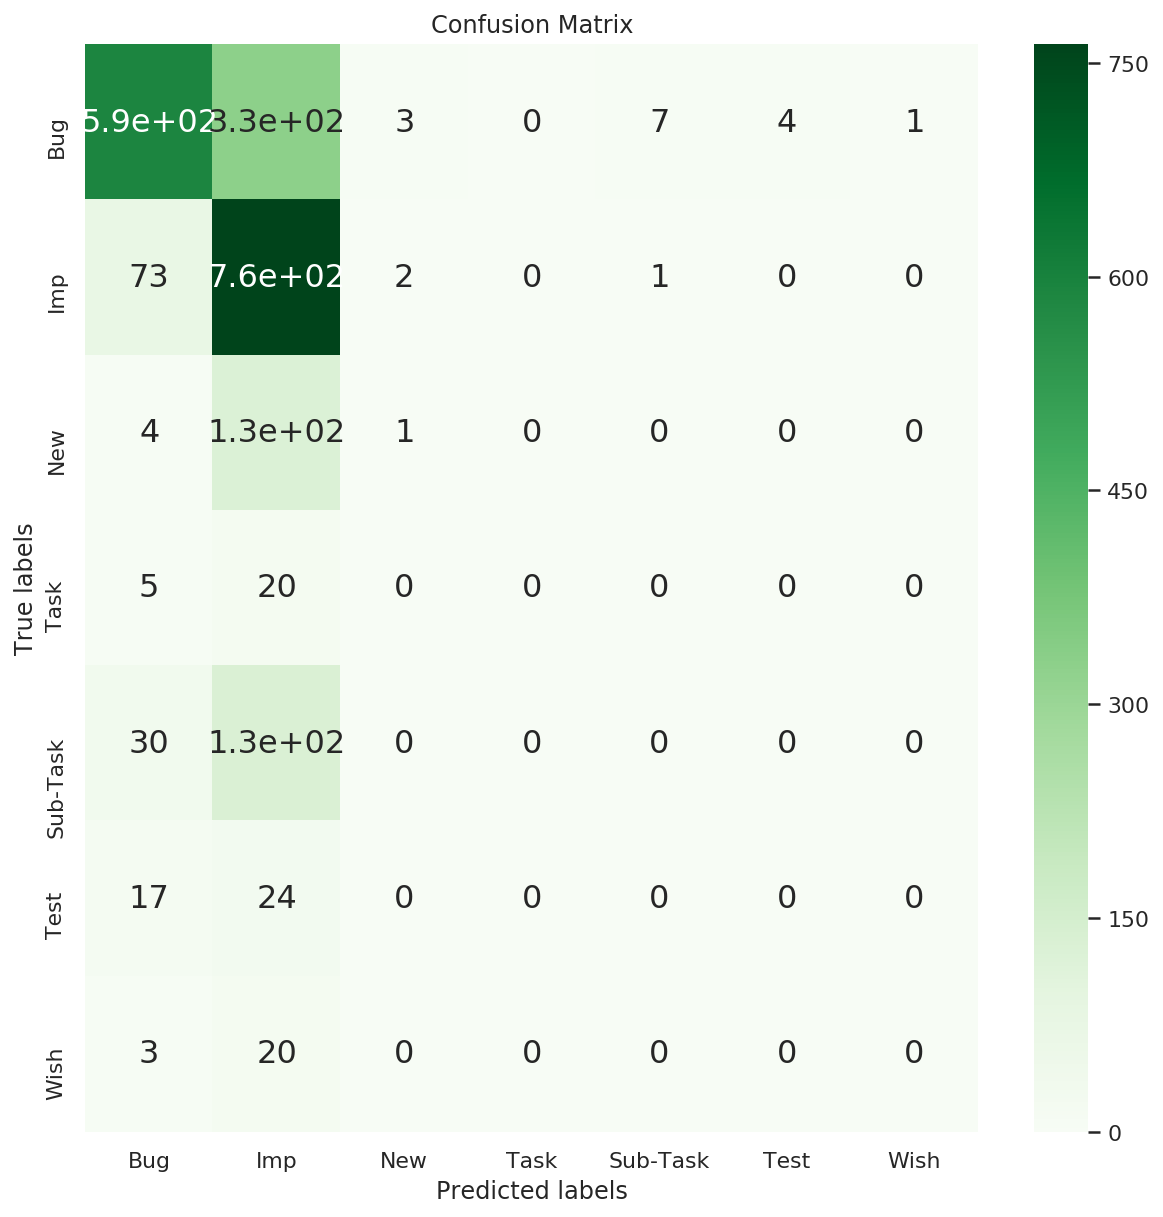

In [0]:
print("Confusion Matrix of Bernoulli Naive Bayes Classifier output: ")
#sklearn.metrics.confusion_matrix(labels_test,bnb_predictions)
print_Desc_report(labels_test,bnb_predictions)

#**Multinomial Naive Bayes**
Bernoulli Naive Bayes just uses the fact that whether a feature is present or not. However if we somehow also take into account the occurrence weight or count of the feature as well (in our case, the TFIDF weight of each feature), we can hypothesize that the performance of such classifier will be equally good, if not better. 

In [0]:
from sklearn.naive_bayes import MultinomialNB
mn_bayes=MultinomialNB()
t0=time()
mn_bayes_fit=mn_bayes.fit(variables_train,labels_train)
training_time_container['mn_naive_bayes']=time()-t0
t0=time()
prediction_mn=mn_bayes_fit.predict(variables_test)
prediction_time_container['mn_naive_bayes']=time()-t0
mn_ascore=sklearn.metrics.accuracy_score(labels_test, prediction_mn) 
accuracy_container['mn_naive_bayes']=mn_ascore

Accuracy Score of Multi-Nomial Naive Bayes: 0.660334
Training Time: 1.046141s
Prediction Time: 0.302344s
Testing Accuracy Of Description: 0.6603336422613532
Testing F1 score Of Description: 0.5979416253894521
              precision    recall  f1-score   support

           0       0.73      0.81      0.77       937
           1       0.60      0.79      0.68       839
           2       0.00      0.00      0.00       131
           3       0.00      0.00      0.00        25
           4       0.00      0.00      0.00       162
           5       0.00      0.00      0.00        41
           6       0.00      0.00      0.00        23

    accuracy                           0.66      2158
   macro avg       0.19      0.23      0.21      2158
weighted avg       0.55      0.66      0.60      2158




/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning:

F-score is ill-defined and being set to 0.0 in labels with no predicted samples.

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.



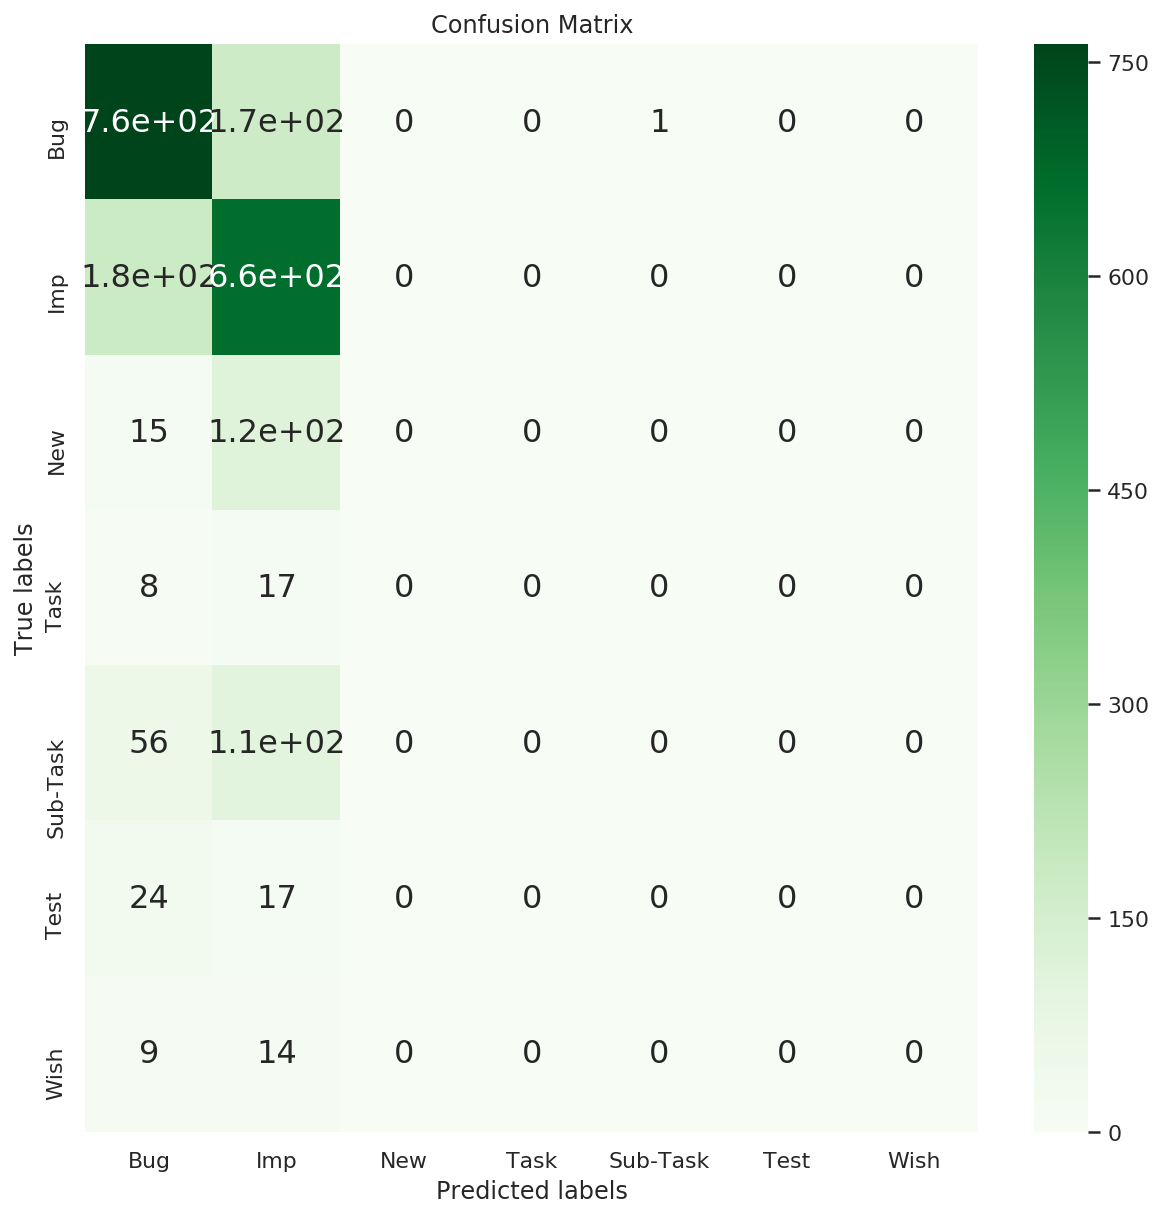

In [0]:
print("Accuracy Score of Multi-Nomial Naive Bayes: %f" %(mn_ascore))
#and its training and prediction time are:
print("Training Time: %fs"%training_time_container['mn_naive_bayes'])
print("Prediction Time: %fs"%prediction_time_container['mn_naive_bayes'])
print_Desc_report(labels_test,prediction_mn)

#**Random Forest Classifier**

Training Time: 28.918417s
Prediction Time: 0.366840s
Accuracy Score of Random Forests Classifier: 
0.6473586654309545
Testing Accuracy Of Description: 0.6473586654309545
Testing F1 score Of Description: 0.5910882568164203
              precision    recall  f1-score   support

           0       0.69      0.83      0.75       937
           1       0.60      0.73      0.66       839
           2       1.00      0.01      0.02       131
           3       1.00      0.04      0.08        25
           4       0.62      0.03      0.06       162
           5       1.00      0.02      0.05        41
           6       1.00      0.09      0.16        23

    accuracy                           0.65      2158
   macro avg       0.84      0.25      0.25      2158
weighted avg       0.68      0.65      0.59      2158




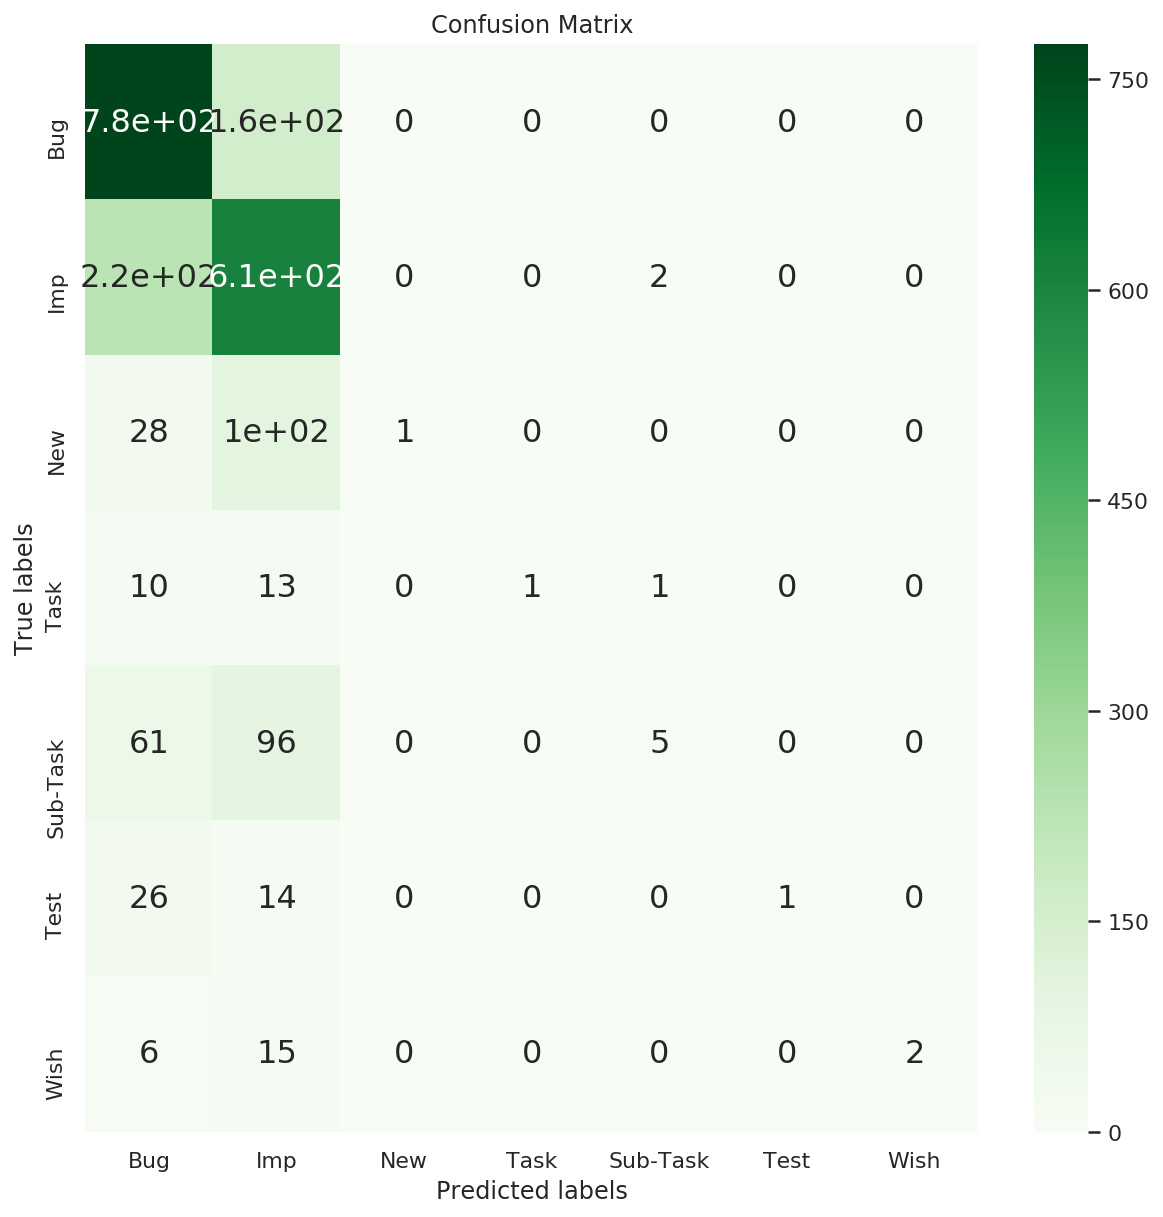

In [0]:
from sklearn.ensemble import RandomForestClassifier

rf_classifier=RandomForestClassifier(n_estimators=50)
t0=time()
rf_classifier=rf_classifier.fit(variables_train,labels_train)

training_time_container['random_forest']=time()-t0
print("Training Time: %fs"%training_time_container['random_forest'])

t0=time()
rf_predictions=rf_classifier.predict(variables_test)
prediction_time_container['random_forest']=time()-t0
print("Prediction Time: %fs"%prediction_time_container['random_forest'])

accuracy_container['random_forest']=sklearn.metrics.accuracy_score(labels_test, rf_predictions)
print ("Accuracy Score of Random Forests Classifier: ")
print(accuracy_container['random_forest'])
print_Desc_report(labels_test,rf_predictions)
#print(sklearn.metrics.confusion_matrix(labels_test,rf_predictions))

#**Linear SVM using Stochastic Gradient Descent**
Stochastic Gradient Descent (SGD) is a one of the most efficient approaches used in linear classifiers under convex loss functions such as (linear) Support Vector Machines. It has proven to perform well in in large-scale and sparse machine learning problems.

Training Time: 63.205476s
Prediction Time: 0.299182s
Accuracy Score of Linear SVM Classifier: 0.643652
Testing Accuracy Of Description: 0.6436515291936978
Testing F1 score Of Description: 0.6083907261952409
              precision    recall  f1-score   support

           0       0.69      0.82      0.75       937
           1       0.62      0.70      0.65       839
           2       0.35      0.10      0.15       131
           3       1.00      0.08      0.15        25
           4       0.38      0.13      0.19       162
           5       0.50      0.10      0.16        41
           6       1.00      0.04      0.08        23

    accuracy                           0.64      2158
   macro avg       0.65      0.28      0.31      2158
weighted avg       0.62      0.64      0.61      2158




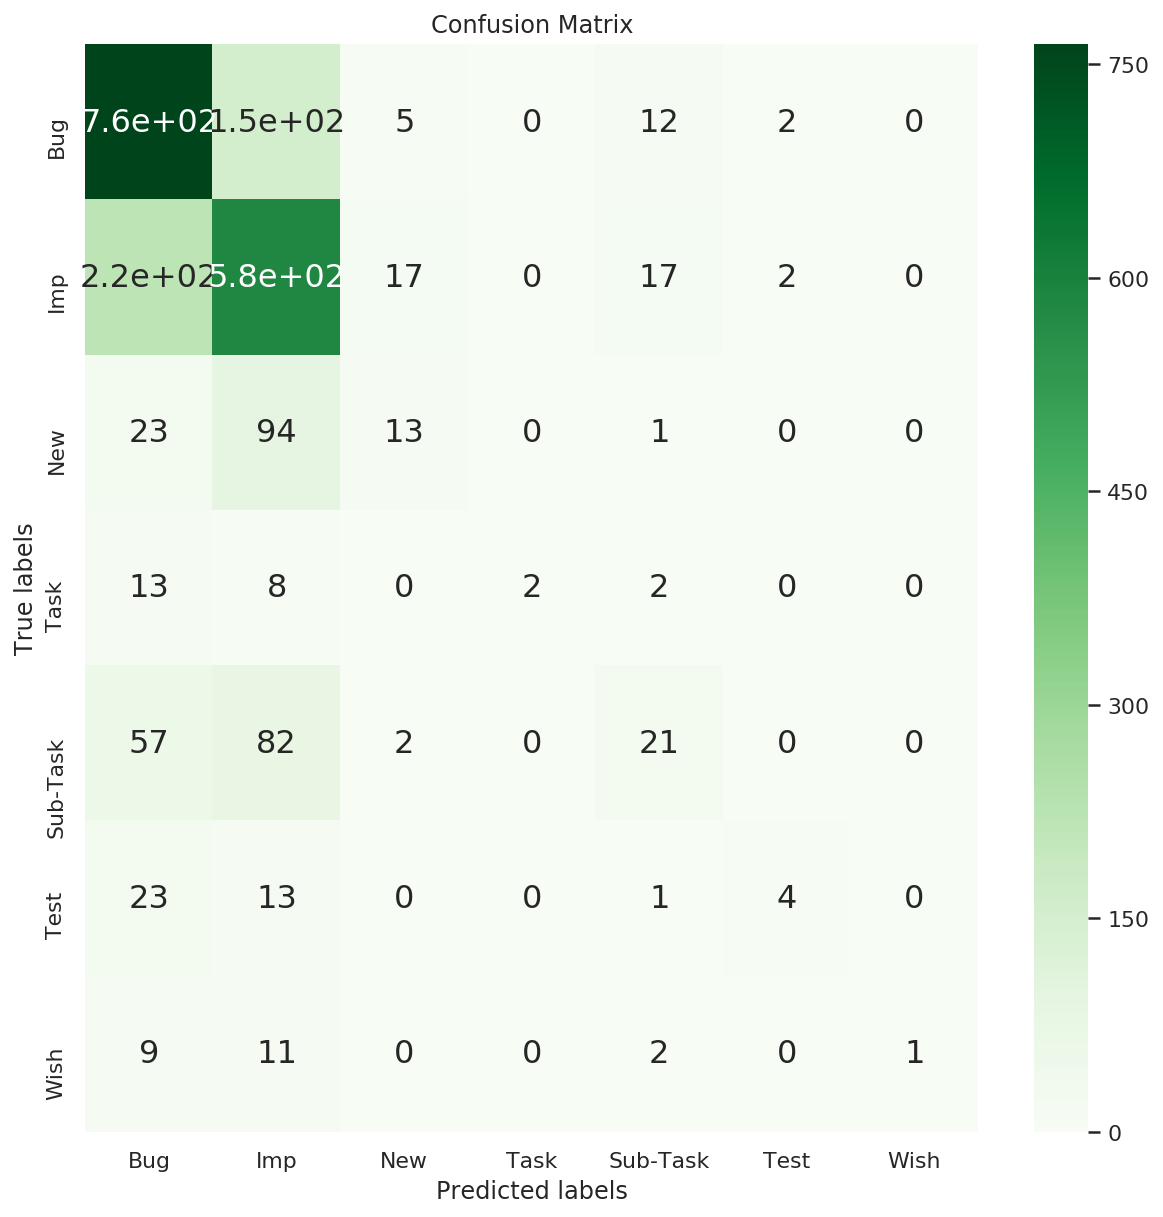

In [0]:
from sklearn import linear_model

svm_classifier=linear_model.SGDClassifier(loss='hinge',alpha=0.0001)

t0=time()
svm_classifier=svm_classifier.fit(variables_train, labels_train)
training_time_container['linear_svm']=time()-t0
print("Training Time: %fs"%training_time_container['linear_svm'])

t0=time()
svm_predictions=svm_classifier.predict(variables_test)
prediction_time_container['linear_svm']=time()-t0
print("Prediction Time: %fs"%prediction_time_container['linear_svm'])

accuracy_container['linear_svm']=sklearn.metrics.accuracy_score(labels_test, svm_predictions)
print ("Accuracy Score of Linear SVM Classifier: %f"%accuracy_container['linear_svm'])
#print(sklearn.metrics.confusion_matrix(labels_test,svm_predictions))
print_Desc_report(labels_test,svm_predictions)

In [0]:
#if we train the SGD Classifier with elastic net penalty, it  brings more sparsity to the model not possible with the L2:
svm_classifier_enet=linear_model.SGDClassifier(loss='hinge',alpha=0.0001,penalty='elasticnet')
svm_classifier_enet=svm_classifier_enet.fit(variables_train, labels_train)
svm_enet_predictions=svm_classifier_enet.predict(variables_test)
print ("Accuracy Score of Linear SVM Classifier: %f"%sklearn.metrics.accuracy_score(labels_test,svm_enet_predictions))

Accuracy Score of Linear SVM Classifier: 0.652919


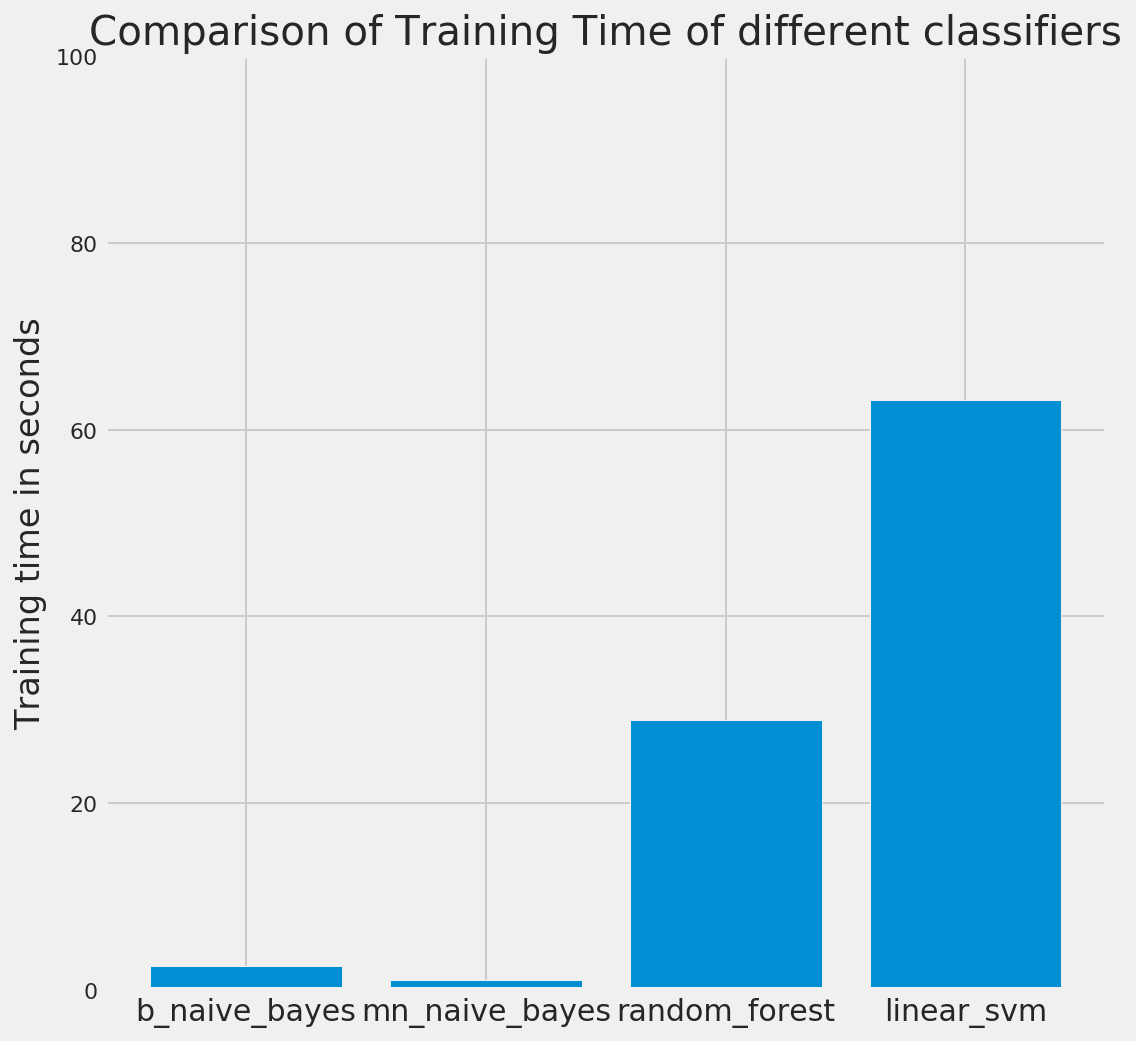

In [0]:
import matplotlib.pyplot as plt
with plt.style.context('fivethirtyeight'):
    plt.figure(figsize=(8,8))
    plt.bar(range(4),training_time_container.values(),align='center')
    plt.xticks(range(4),training_time_container.keys(),fontsize = 15)
    plt.ylabel("Training time in seconds")
    plt.ylim(0,100)
    plt.grid(True)
    plt.title("Comparison of Training Time of different classifiers")

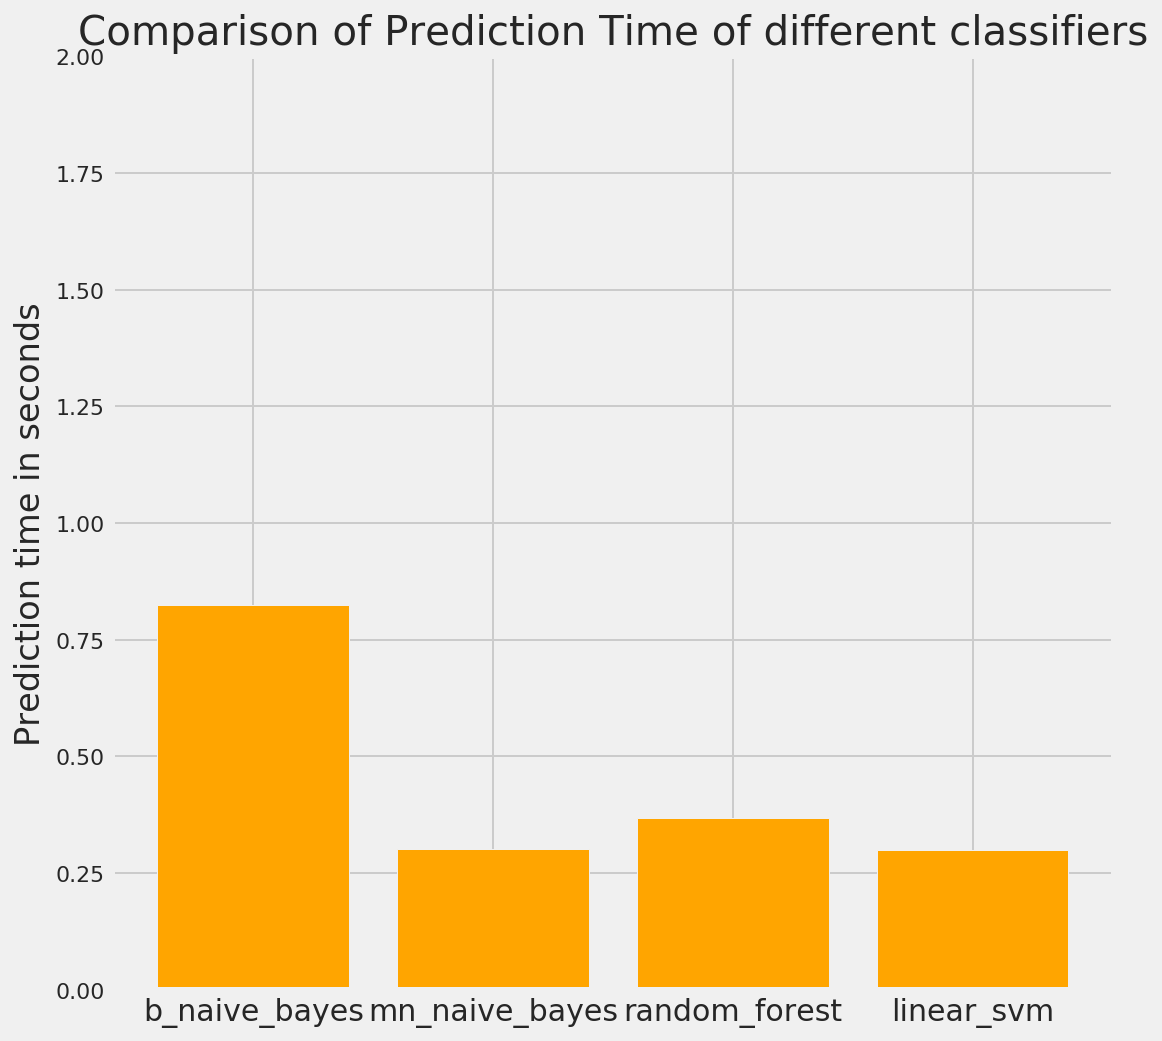

In [0]:
with plt.style.context('fivethirtyeight'):
    plt.figure(figsize=(8,8))
    plt.bar(range(4),prediction_time_container.values(),align='center',color='orange')
    plt.xticks(range(4),prediction_time_container.keys(),fontsize = 15)
    plt.ylabel("Prediction time in seconds")
    plt.grid(True)
    plt.ylim(0,2)
    plt.title("Comparison of Prediction Time of different classifiers")

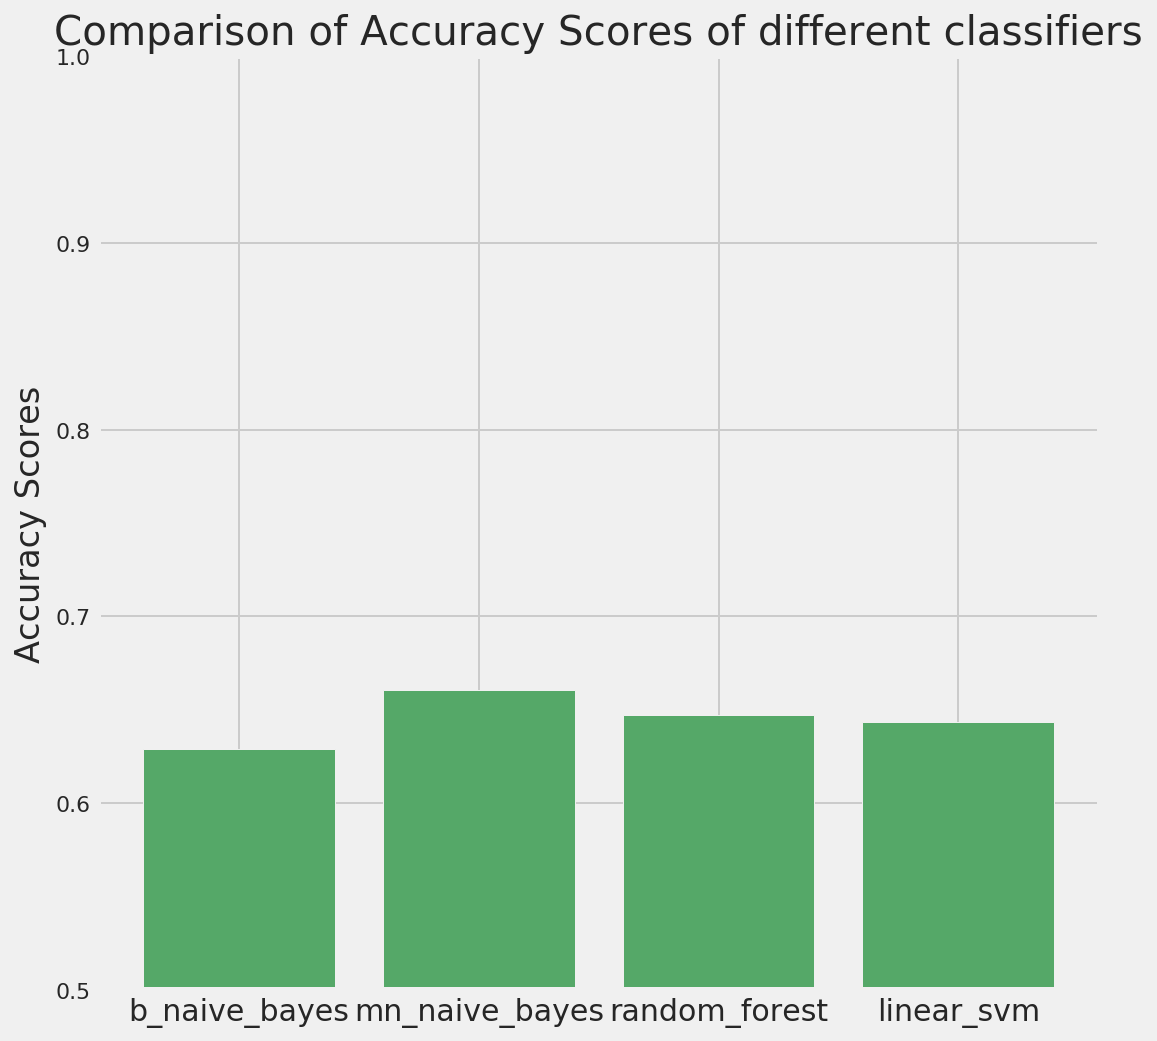

In [0]:
with plt.style.context('fivethirtyeight'):
    plt.figure(figsize=(8,8))
    plt.bar(range(4),accuracy_container.values(),align='center',color='g')
    plt.xticks(range(4),accuracy_container.keys(),fontsize = 15)
    plt.ylabel("Accuracy Scores")
    plt.grid(True)
    plt.title("Comparison of Accuracy Scores of different classifiers")
    plt.ylim(0.5,1.0)

#**So far we are using the unbalanced dataset, thats why we get such less accuracy upon every classifier.**
#**Suggestions to improve the accuracy and improving the readability are welcomed**


#**Ensemble Learning**

##Voting Classifier

training_time_container={'b_naive_bayes':0,'mn_naive_bayes':0,'random_forest':0,'linear_svm':0}

prediction_time_container={'b_naive_bayes':0,'mn_naive_bayes':0,'random_forest':0,'linear_svm':0}

accuracy_container={'b_naive_bayes':0,'mn_naive_bayes':0,'random_forest':0,'linear_svm':0}

#Variables used earlier for classifiers.

bnb_classifier=BernoulliNB()

mn_bayes=MultinomialNB()

rf_classifier=RandomForestClassifier(n_estimators=50)

svm_classifier=linear_model.SGDClassifier(loss='hinge',alpha=0.0001)

nl_svm_classifier=SVC(C=1000000.0, gamma='auto_deprecated', kernel='rbf')

variables_train, variables_test, labels_train, labels_test  =   train_test_split(variables, labels, test_size=.3)



#**Hard Voting / Majority Voting**

In [0]:
# Funtions to print confusion matrix
from sklearn import metrics
from sklearn.metrics import accuracy_score,f1_score
import matplotlib.pyplot as plt
import seaborn as sb
import pandas as pd

def confusion_plot_desc(cm):
    labels = ['Bug','Imp','New','Task','Sub-Task','Test','Wish']
    df_cm = pd.DataFrame(cm,index=[i for i in labels],columns = [i for i in labels])
    plt.figure(figsize=(10,10))
    #sb.set(font_scale=1.5)
    ax = plt.subplot()
    sb.heatmap(df_cm, annot=True, ax=ax, annot_kws={"size" :16}, cmap="Blues"); #annot=True to annotate cells
    
    # labels, title and ticks
    ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels') 
    ax.set_title('Confusion Matrix')
    #ax.xaxis.set_ticklabels(labels); ax.yaxis.set_ticklabels(labels)
   
    
# function to print Description report
def print_Desc_report(y_true, y_pred):
    print('Testing Accuracy Of Description: {}'.format(accuracy_score(y_true, y_pred)))
    print('Testing F1 score Of Description: {}'.format(f1_score(y_true, y_pred, average='weighted')))
    print(metrics.classification_report(y_true, y_pred))
    cm = metrics.confusion_matrix(y_true, y_pred)
    confusion_plot_desc(cm)
    print()

In [0]:
from sklearn.ensemble import VotingClassifier
estimators = []
estimators.append(('Bernoulli',bnb_classifier))
estimators.append(('Multinomial',mn_bayes))
estimators.append(('RandomForest',rf_classifier))
estimators.append(('SVMLinear',svm_classifier))
#estimators.append(('SVMNonLinear',nl_svm_classifier))
ensemble = VotingClassifier(estimators,voting = 'hard')
#results = model_selection.cross_val_score(ensemble, X, Y, cv=kfold)  # can be used if cross validation technique for increasing accuracy is used.
#print(results.mean())

In [0]:
#fit model to training data
t0=time()
ensemble.fit(variables_train, labels_train)

ensemble_training_time=time()-t0
print("Training Time: %fs"%ensemble_training_time)
#test our model on the test data
ensemble.score(variables_test, labels_test)

Training Time: 100.091590s


0.6654309545875811

Prediction Time: 1.809528s
Accuracy Score of Hard-Voting Ensemble is : 0.665431
Testing Accuracy Of Description: 0.6654309545875811
Testing F1 score Of Description: 0.6040394116908729
              precision    recall  f1-score   support

           0       0.72      0.83      0.77       937
           1       0.61      0.78      0.68       839
           2       1.00      0.01      0.02       131
           3       0.00      0.00      0.00        25
           4       0.50      0.01      0.01       162
           5       1.00      0.02      0.05        41
           6       0.00      0.00      0.00        23

    accuracy                           0.67      2158
   macro avg       0.55      0.24      0.22      2158
weighted avg       0.67      0.67      0.60      2158




/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning:

F-score is ill-defined and being set to 0.0 in labels with no predicted samples.

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.



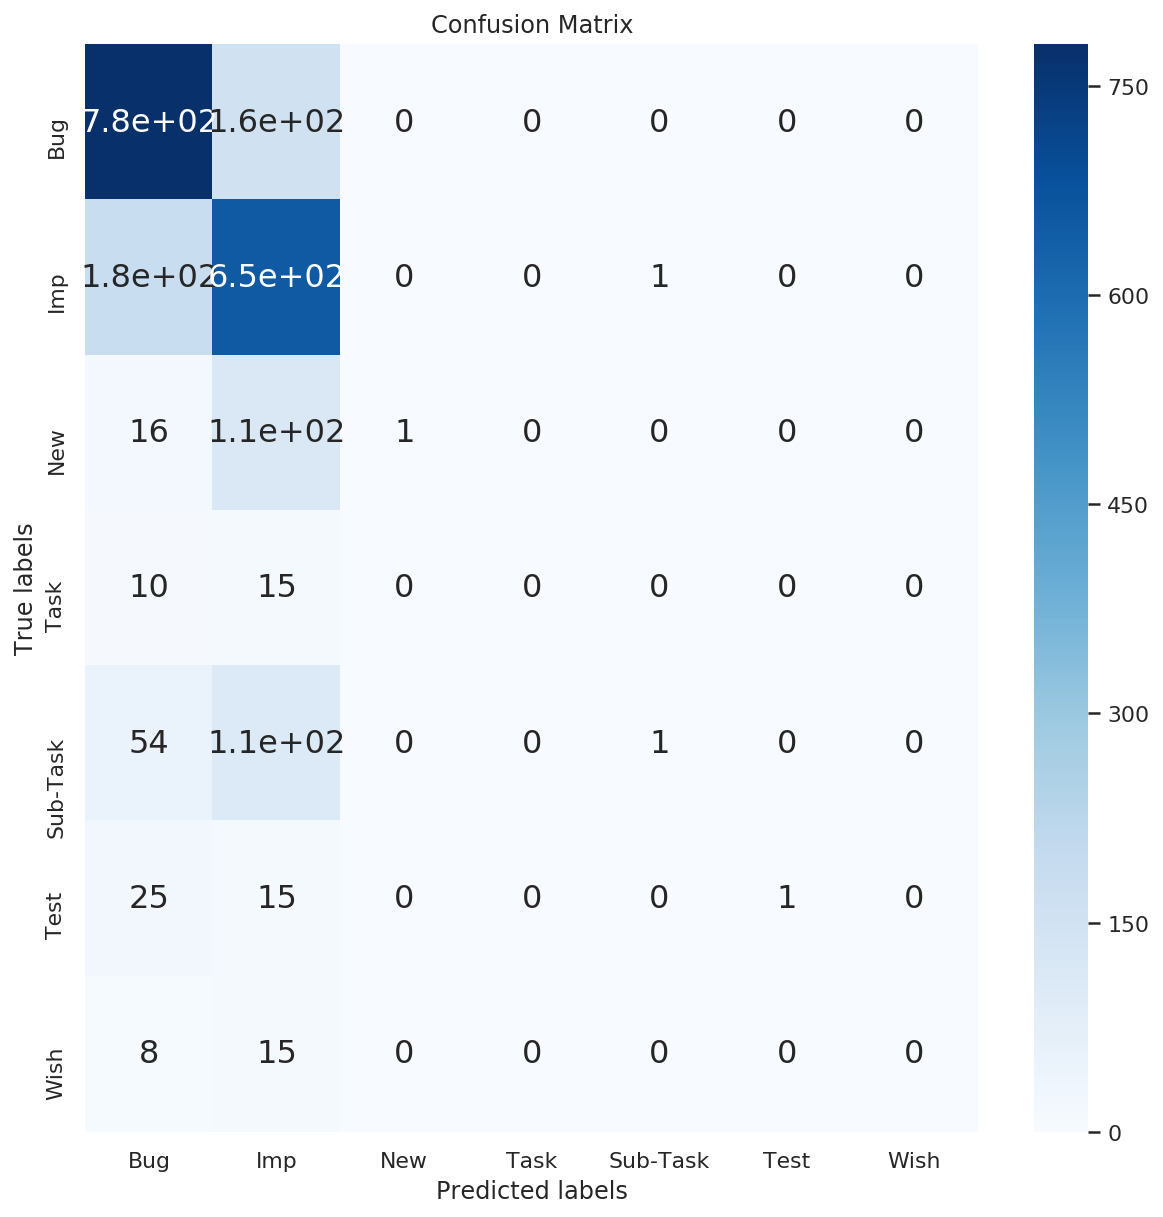

In [0]:
t0=time()
ensemble_predictions=ensemble.predict(variables_test)
ensemble_prediction_time = time() - t0
print("Prediction Time: %fs"%ensemble_prediction_time)

accuracy_container['Ensemble_hard']=sklearn.metrics.accuracy_score(labels_test, ensemble_predictions)
print("Accuracy Score of Hard-Voting Ensemble is : %f" %accuracy_container['Ensemble_hard'])
print_Desc_report(labels_test,ensemble_predictions)
#print(sklearn.metrics.confusion_matrix(labels_test,ensemble_predictions))

##If ‘soft’, predicts the class label based on the argmax of the sums of the predicted probabilities, which is recommended for an ensemble of well-calibrated classifiers.

So what we need is calibrated classifiers Svm me loss= hinge rahega to classifier is non calibrated first calibrate it.


SGDClassifier(loss = 'hinge') does not have probability by default.

You have to pass SGDclassifier(loss = 'hinge') to CalibratedClassifierCV() which will calculate the probability values of SGDclassifier(loss = 'hinge')

Training Time: 31.150784s
Accuracy: 0.644115s
Prediction Time: 1.512995s
Accuracy Score of Soft-Voting Ensemble is : 0.644115
Testing Accuracy Of Description: 0.644114921223355
Testing F1 score Of Description: 0.5868904668461086
              precision    recall  f1-score   support

           0       0.81      0.68      0.74       937
           1       0.55      0.89      0.68       839
           2       0.33      0.01      0.01       131
           3       0.00      0.00      0.00        25
           4       0.00      0.00      0.00       162
           5       0.00      0.00      0.00        41
           6       0.00      0.00      0.00        23

    accuracy                           0.64      2158
   macro avg       0.24      0.23      0.21      2158
weighted avg       0.58      0.64      0.59      2158


[[640 295   1   0   0   1   0]
 [ 89 749   1   0   0   0   0]
 [  4 126   1   0   0   0   0]
 [  6  19   0   0   0   0   0]
 [ 32 130   0   0   0   0   0]
 [ 18  23   0   0 

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning:

F-score is ill-defined and being set to 0.0 in labels with no predicted samples.

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.



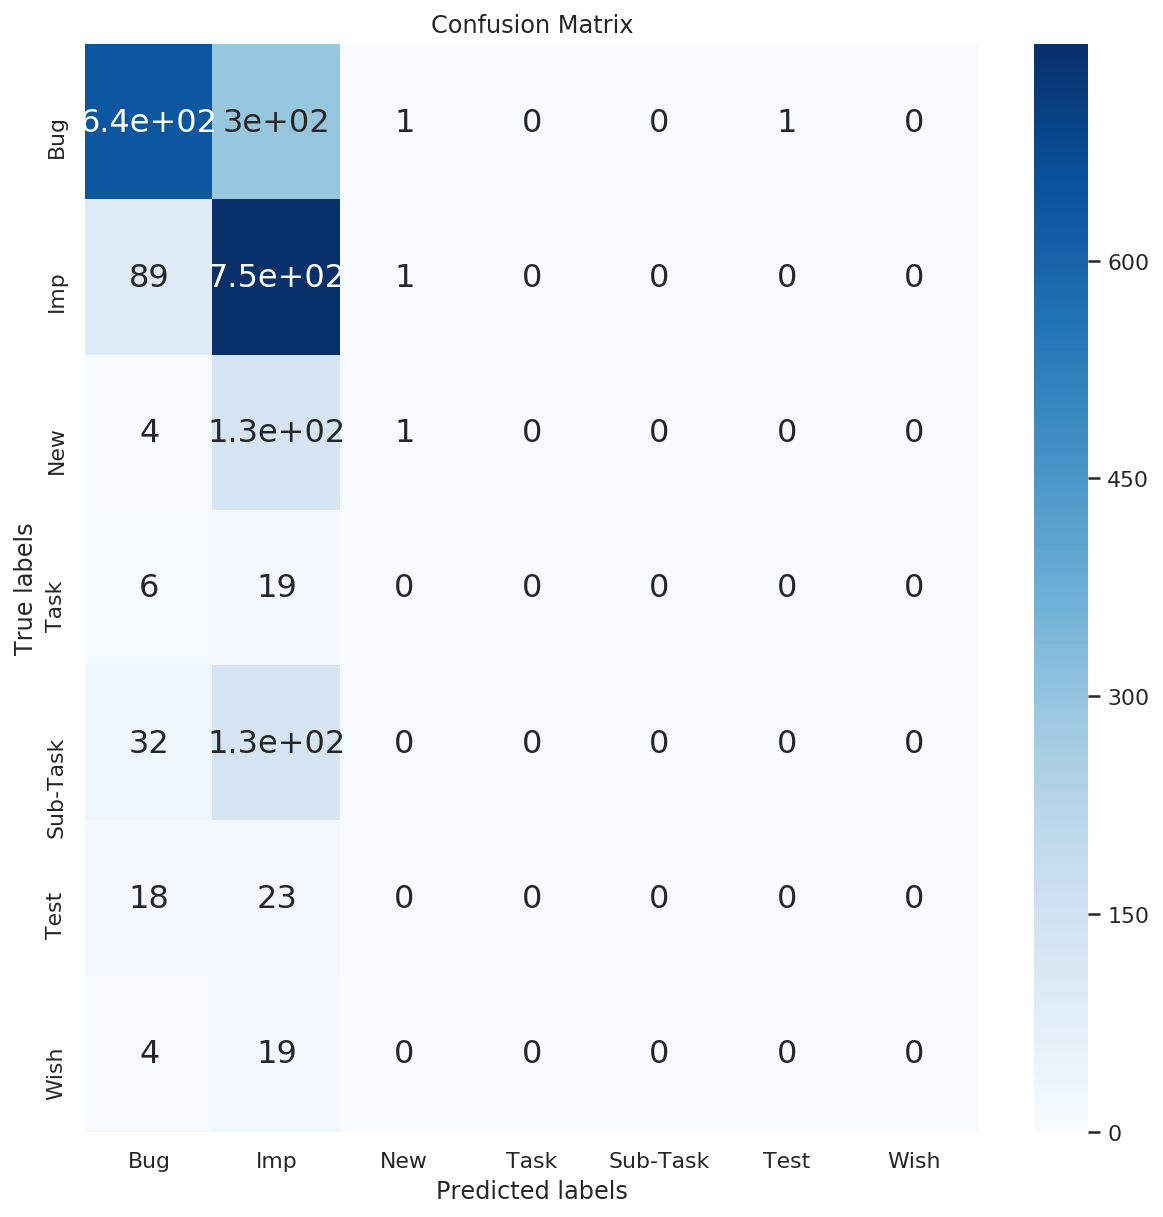

In [0]:
estimators1 = []
estimators1.append(('Bernoulli',bnb_classifier))
estimators1.append(('Multinomial',mn_bayes))
estimators1.append(('RandomForest',rf_classifier))
#estimators1.append(('SVMLinear',svm_calibrator))   # SVM chal hi nhi rha calibrated classifier pass karne ke baad bhi prob aa rhi.

ensemble2 = VotingClassifier(estimators1,voting = 'soft')
#fit model to training data
t0=time()
ensemble2.fit(variables_train, labels_train)

ensemble2_training_time=time()-t0
print("Training Time: %fs"%ensemble2_training_time)
#test our model on the test data
print("Accuracy: %fs"%ensemble2.score(variables_test, labels_test))
t0=time()
ensemble2_predictions=ensemble2.predict(variables_test)
ensemble2_prediction_time = time() - t0
print("Prediction Time: %fs"%ensemble2_prediction_time)

accuracy_container['Ensemble_soft']=sklearn.metrics.accuracy_score(labels_test, ensemble2_predictions)
print("Accuracy Score of Soft-Voting Ensemble is : %f" %accuracy_container['Ensemble_soft'])
print_Desc_report(labels_test,ensemble2_predictions)
#print(sklearn.metrics.confusion_matrix(labels_test,ensemble2_predictions))

#**Bagged Decision Trees**
## BaggingClassifier with the Classification and Regression Trees algorithm (DecisionTreeClassifier). A total of 100 trees are created.

In [0]:
from time import time 
import random
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
cart = DecisionTreeClassifier()
num_trees = 100       #tweaking this value for accuracy increase, but keep an eye for overfitting.
Bagging_classifier= BaggingClassifier(base_estimator=cart, n_estimators=num_trees, random_state=random.seed())
t0=time()
Bagging_classifier.fit(variables_train, labels_train)

BaggingClassifier_training_time=time()-t0
print("Training Time: %fs"%BaggingClassifier_training_time)

#test our model on the test data

print("Accuracy: %fs"%Bagging_classifier.score(variables_test, labels_test))


Training Time: 764.446920s
Accuracy: 0.630213s


Prediction Time: 54.513190s
Accuracy Score of Bagging classifier is : 0.630213
Testing Accuracy Of Description: 0.6302131603336423
Testing F1 score Of Description: 0.5894897583576036
              precision    recall  f1-score   support

           0       0.68      0.78      0.73       937
           1       0.59      0.71      0.64       839
           2       0.50      0.03      0.06       131
           3       1.00      0.04      0.08        25
           4       0.41      0.12      0.18       162
           5       0.83      0.12      0.21        41
           6       1.00      0.09      0.16        23

    accuracy                           0.63      2158
   macro avg       0.72      0.27      0.29      2158
weighted avg       0.62      0.63      0.59      2158


[[730 202   0   0   5   0   0]
 [218 599   4   0  17   1   0]
 [ 22 102   4   0   3   0   0]
 [ 10  13   0   1   1   0   0]
 [ 64  79   0   0  19   0   0]
 [ 24  12   0   0   0   5   0]
 [  6  14   0   0   1   0   2]]


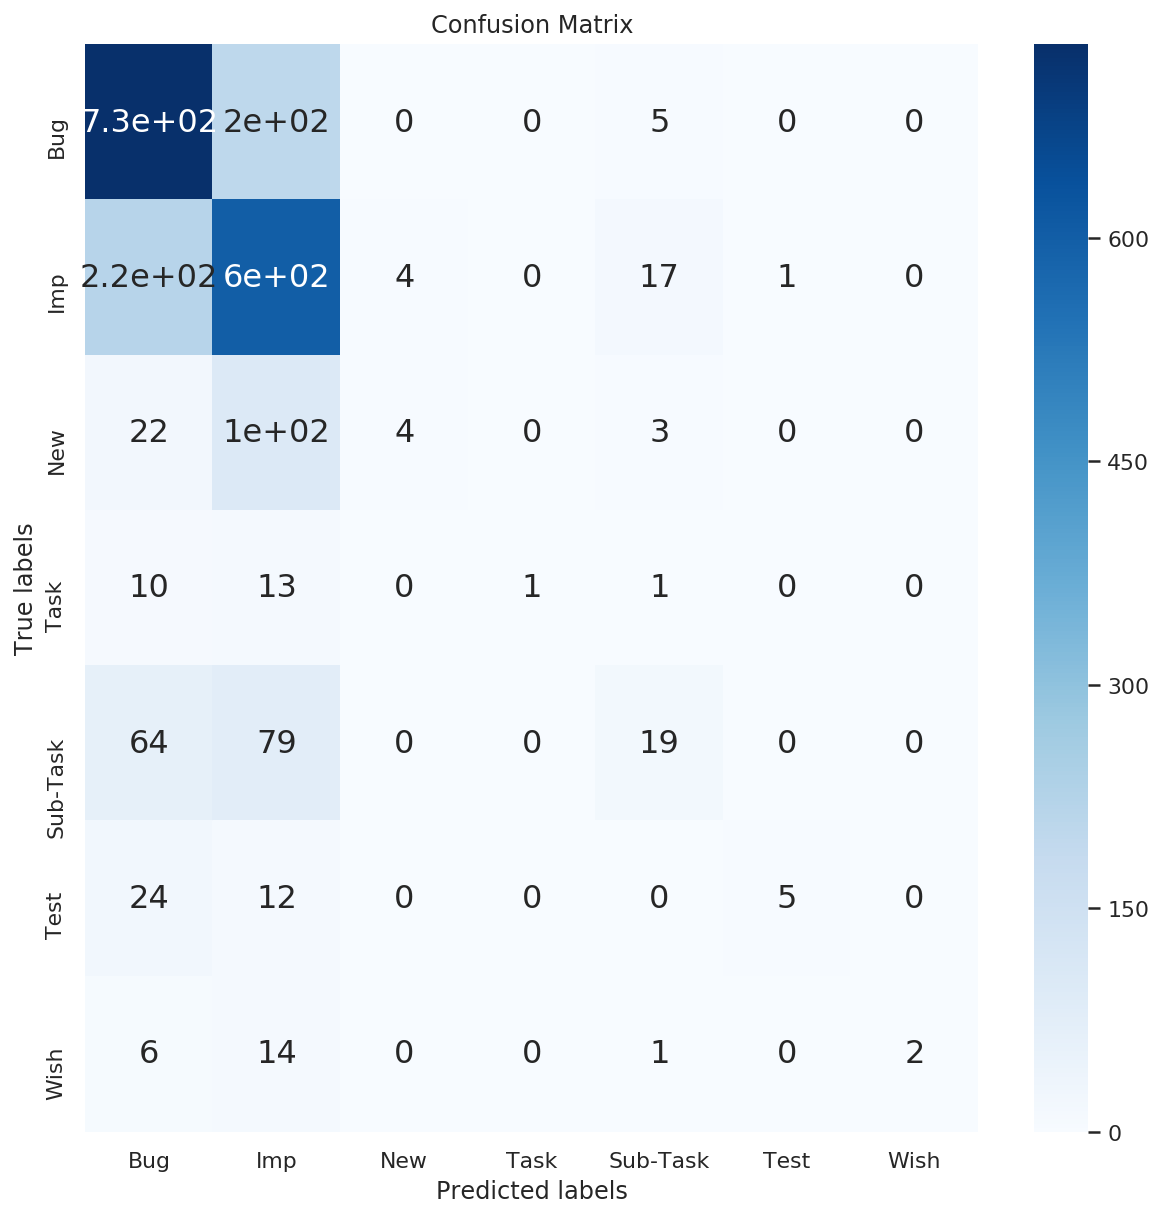

In [0]:
t0=time()
BaggingClassifier_predictions=Bagging_classifier.predict(variables_test)
BaggingClassifier_prediction_time = time() - t0
print("Prediction Time: %fs"%BaggingClassifier_prediction_time)

accuracy_container['Bagging_classifier']=sklearn.metrics.accuracy_score(labels_test, BaggingClassifier_predictions)
print("Accuracy Score of Bagging classifier is : %f" %accuracy_container['Bagging_classifier'])
print_Desc_report(labels_test,BaggingClassifier_predictions)
#print(sklearn.metrics.confusion_matrix(labels_test,BaggingClassifier_predictions))

#**Boosting Algorithm**
##**Adaboost**

It generally works by weighting instances in the dataset by how easy or difficult they are to classify, allowing the algorithm to pay or or less attention to them in the construction of subsequent models.

Training Time: 390.045136s
Accuracy: 0.454124s
Prediction Time: 22.654178s
Accuracy Score of Adaboost classifier is : 0.454124
Testing Accuracy Of Description: 0.4541241890639481
Testing F1 score Of Description: 0.4074478464448334
              precision    recall  f1-score   support

           0       0.48      0.76      0.59       937
           1       0.44      0.28      0.34       839
           2       0.00      0.00      0.00       131
           3       0.00      0.00      0.00        25
           4       0.38      0.12      0.19       162
           5       0.27      0.20      0.23        41
           6       0.07      0.13      0.10        23

    accuracy                           0.45      2158
   macro avg       0.23      0.21      0.21      2158
weighted avg       0.41      0.45      0.41      2158


[[712 192   0   0   7   9  17]
 [560 237   0   0  20   7  15]
 [ 76  46   0   0   2   3   4]
 [ 11  11   0   0   3   0   0]
 [ 98  38   0   2  20   3   1]
 [ 23   9   0   

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning:

F-score is ill-defined and being set to 0.0 in labels with no predicted samples.

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.



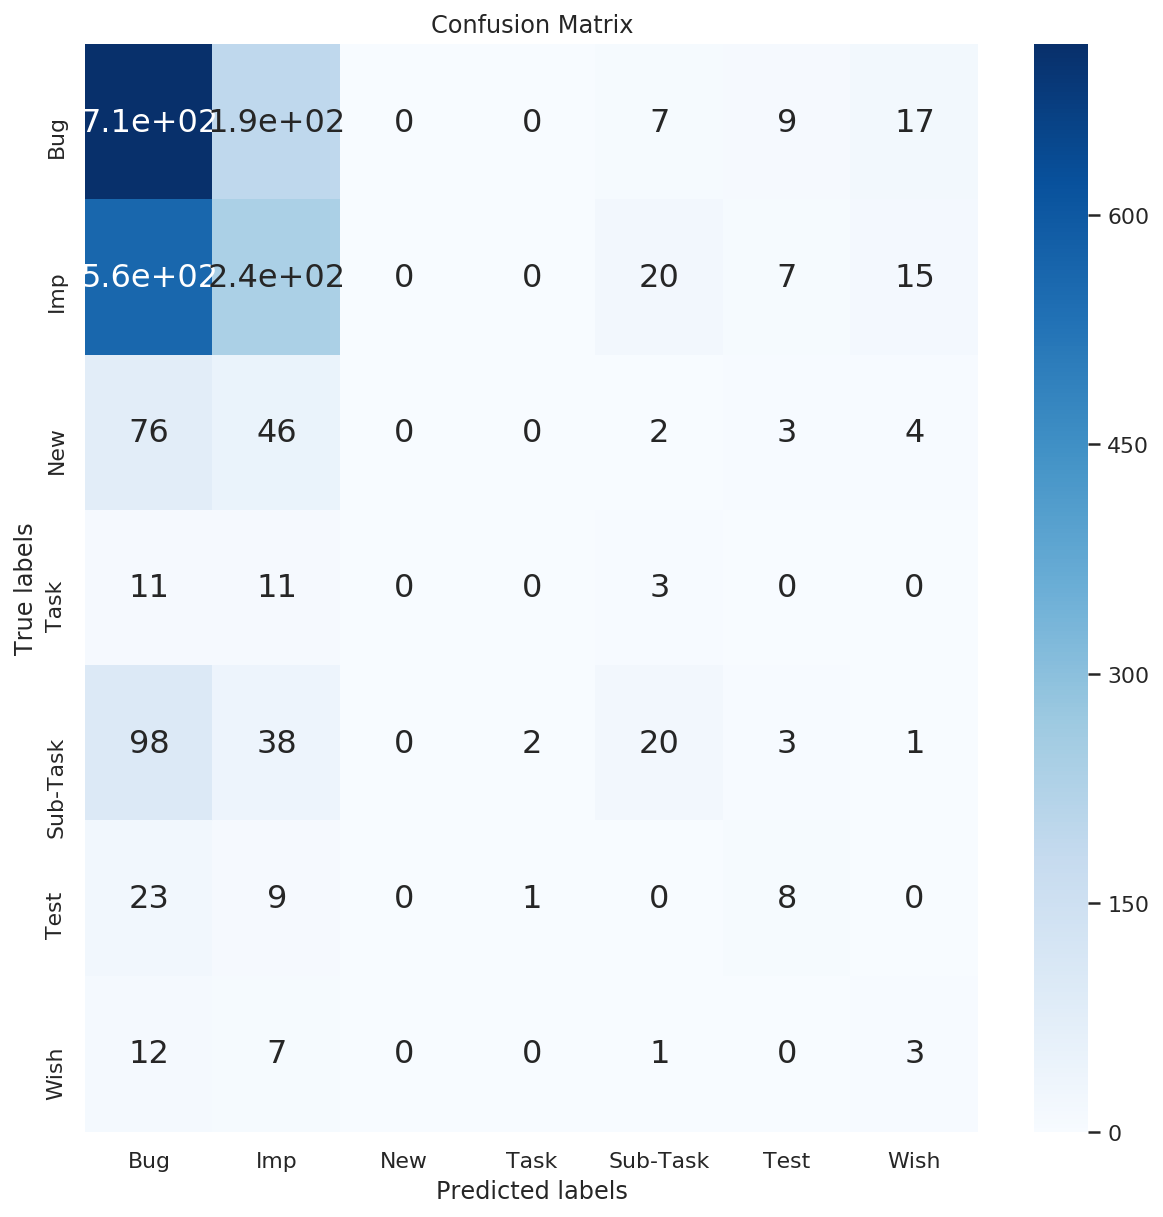

In [0]:
from sklearn.ensemble import AdaBoostClassifier
seed = 7
num_trees = 100
Adaboost_classifier = AdaBoostClassifier(n_estimators=num_trees, random_state=seed)
t0=time()
Adaboost_classifier.fit(variables_train, labels_train)

AdaboostClassifier_training_time=time()-t0
print("Training Time: %fs"%AdaboostClassifier_training_time)

#test our model on the test data
print("Accuracy: %fs"%Adaboost_classifier.score(variables_test, labels_test))
t0=time()
AdaboostClassifier_predictions = Adaboost_classifier.predict(variables_test)
AdaboostClassifier_prediction_time = time() - t0
print("Prediction Time: %fs"%AdaboostClassifier_prediction_time)

accuracy_container['Adaboost_classifier']=sklearn.metrics.accuracy_score(labels_test, AdaboostClassifier_predictions)
print("Accuracy Score of Adaboost classifier is : %f" %accuracy_container['Adaboost_classifier'])

print_Desc_report(labels_test,AdaboostClassifier_predictions)
#print(sklearn.metrics.confusion_matrix(labels_test,AdaboostClassifier_predictions))

##**Stochastic Gradient Boosting**


Training Time: 6418.791883s
Accuracy: 0.637627s
Prediction Time: 0.319595s
Accuracy Score of SGB_classifier is : 0.637627
Testing Accuracy Of Description: 0.6376274328081557
Testing F1 score Of Description: 0.6014098740127526
              precision    recall  f1-score   support

         Bug       0.70      0.81      0.75       953
 Improvement       0.60      0.69      0.64       831
 New Feature       0.29      0.06      0.10       121
    Sub-task       0.23      0.08      0.12        39
        Task       0.40      0.09      0.15       150
        Test       0.28      0.12      0.17        40
        Wish       0.08      0.04      0.06        24

    accuracy                           0.64      2158
   macro avg       0.37      0.27      0.28      2158
weighted avg       0.60      0.64      0.60      2158




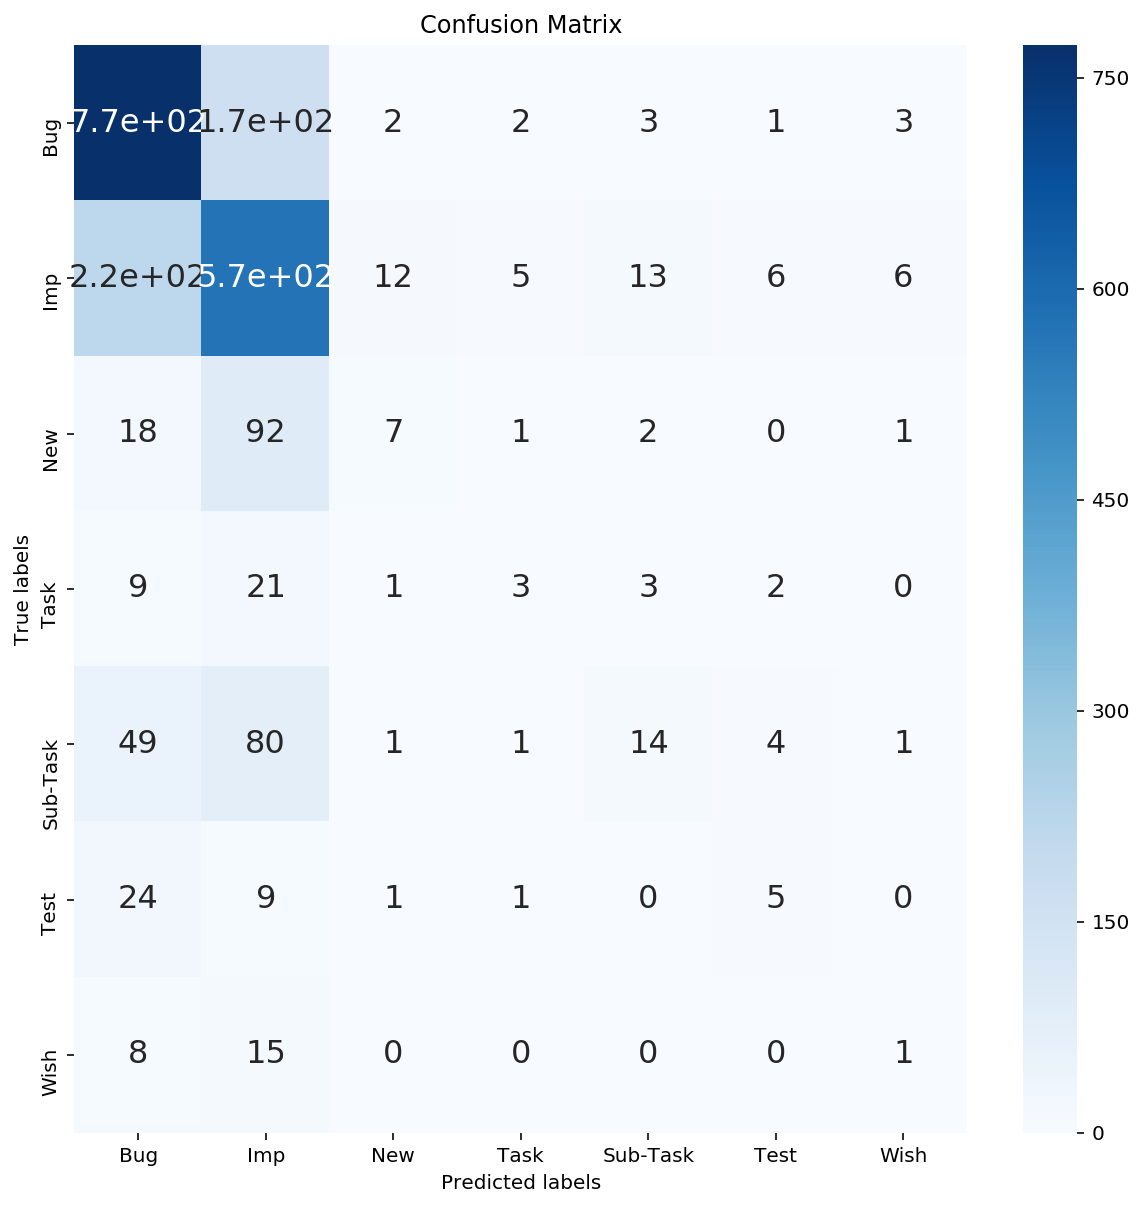

In [0]:

from time import time
from sklearn.ensemble import GradientBoostingClassifier
seed = 7
num_trees = 100
SGB_classifier = GradientBoostingClassifier(n_estimators=num_trees, random_state=seed)
t0=time()
SGB_classifier.fit(variables_train, labels_train)

SGBClassifier_training_time=time()-t0
print("Training Time: %fs"%SGBClassifier_training_time)

#test our model on the test data
print("Accuracy: %fs"%SGB_classifier.score(variables_test, labels_test))
t0=time()
SGBClassifier_predictions = SGB_classifier.predict(variables_test)
SGBClassifier_prediction_time = time() - t0
print("Prediction Time: %fs"%SGBClassifier_prediction_time)

accuracy_container['SGB_classifier']=sklearn.metrics.accuracy_score(labels_test, SGBClassifier_predictions)
print("Accuracy Score of SGB_classifier is : %f" %accuracy_container['SGB_classifier'])
print_Desc_report(labels_test,SGBClassifier_predictions)
#print(sklearn.metrics.confusion_matrix(labels_test,SGBClassifier_predictions))

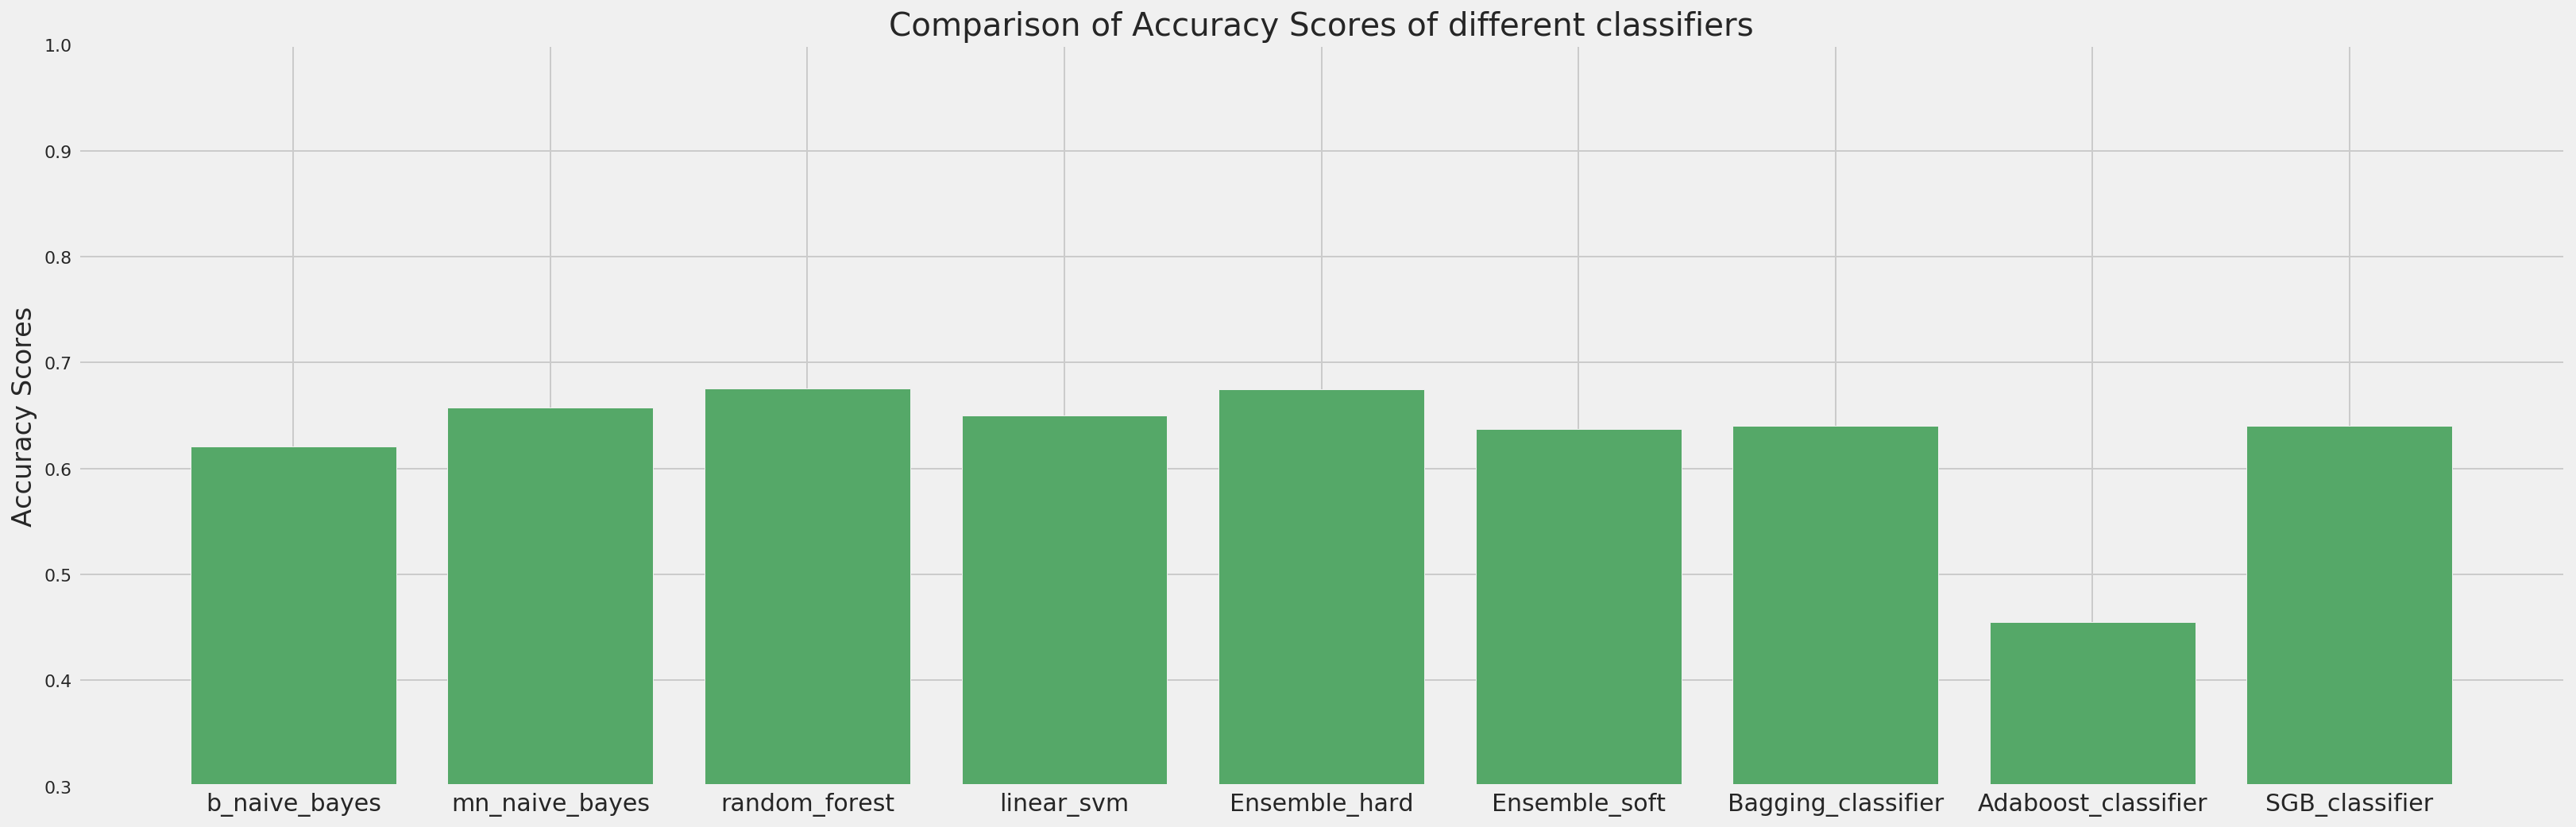

In [0]:
with plt.style.context('fivethirtyeight'):
    plt.figure(figsize=(25,8))
    plt.bar(range(9),accuracy_container.values(),align='center',color='g')
    plt.xticks(range(9),accuracy_container.keys(),fontsize = 15)
    plt.ylabel("Accuracy Scores")
    plt.grid(True)
    plt.title("Comparison of Accuracy Scores of different classifiers")
    plt.ylim(0.3,1.0)